## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
# ваш код здесь

# Переводим pickup_datetime в тип datetime
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

# Определяем временные рамки данных (без учета времени)
min_date = taxi_data['pickup_datetime'].dt.date.min()
max_date = taxi_data['pickup_datetime'].dt.date.max()

print(f"Данные представлены за период с {min_date} по {max_date}")
print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")

Данные представлены за период с 2016-01-01 по 2016-06-30
Минимальная дата: 2016-01-01
Максимальная дата: 2016-06-30


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [4]:
# ваш код здесь
missing_values = taxi_data.isnull().sum()
total_missing = missing_values.sum()

print("Количество пропусков по столбцам:")
print(missing_values)
print(f"\nОбщее количество пропущенных значений: {total_missing}")

Количество пропусков по столбцам:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

Общее количество пропущенных значений: 0


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [5]:
# ваш код здесь

# Сколько уникальных таксопарков присутствует в данных
display(taxi_data['vendor_id'].unique())

# Каково максимальное количество пассажиров
display(taxi_data['passenger_count'].max())

# Статистическое описание целевой переменной trip_duration
display(taxi_data['trip_duration'].describe())
display(taxi_data['trip_duration'].median())

array([2, 1])

np.int64(9)

count    1.458644e+06
mean     9.594923e+02
std      5.237432e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.620000e+02
75%      1.075000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

np.float64(662.0)

Что интересного мы увидели? В данных присутствуют поездки, продолжительность которых составляет одну секунду, а также поездки, продолжительность которых больше 40 дней. Сразу приходит мысль, что это выбросы.

→ При дальнейшем анализе выяснится, что у нас также есть «телепортации» — поездки, которые были проделаны за секунды на большие расстояния. Но всему своё время.

Чтобы однозначно обозначить такие записи в таблице как выбросы, нам необходимо произвести более глубокий анализ данных с подключением дополнительной информации.

Примечание. На основе полученной статистической информации о целевом признаке trip_duration мы также делаем важный вывод, что использование среднего в качестве центральной меры распределения длительности поездок будет грубой ошибкой. Лучше всего подойдут меры, не зависящие от выбросов, такие как усечённое среднее, логарифмическое среднее или медиана. При проведении исследований мы будем использовать медиану, а наша метрика качества моделей будет завязана на логарифмическом среднем.

Займёмся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками.

Примечание. Так как все манипуляции над данными мы будем применять как с тренировочным, так и с тестовым набором данных, во избежание дублирования кода мы будем производить предобработку с помощью функций. Также применение функций позволит нам сделать код гораздо более эстетичным и читабельным, что будет плюсом при просмотре вашего проекта потенциальным работодателем.

Начнём с временных характеристик. Как нам уже известно, хранить дату и время в формате datetime как категориальный признак редко имеет смысл, поэтому их разбивают на отдельные признаки. Эти признаки могут как стать основными факторами при построении модели, так и быть вспомогательными для извлечения информации из других таблиц.

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [6]:
# ваш код здесь

# Функция добавляет временные признаки на основе столбца pickup_datetime
# Parameters:
# data (DataFrame): Таблица с данными о поездках  
# Returns:
# DataFrame: Таблица с добавленными временными признаками

def add_datetime_features(data):
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Добавляем дату без времени
    df['pickup_date'] = df['pickup_datetime'].dt.date
    
    # Добавляем час дня
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    
    # Добавляем порядковый номер дня недели (понедельник = 0, воскресенье = 6)
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_datetime_features(taxi_data)

# а) Сколько поездок было совершено в субботу (5 - суббота)
saturday_trips = (taxi_data['pickup_day_of_week'] == 5).sum()
print(f"Количество поездок в субботу: {saturday_trips}")

# б) Сколько поездок в среднем совершается в день
trips_per_day = taxi_data.groupby('pickup_date').size()
avg_trips_per_day = trips_per_day.mean()
print(f"Среднее количество поездок в день: {round(avg_trips_per_day)}")

Количество поездок в субботу: 220868
Среднее количество поездок в день: 8015


От того, является ли день праздничным, часто зависит ситуация на дорогах. Большое количество автомобилей создаёт пробки и потенциально увеличивает длительность совершаемой на такси поездки.

Давайте добавим в наш датасет информацию о том, является ли день праздничным. Для этого мы собрали даты всех праздничных дней в Америке за 2016 год. Данные представлены в табличном формате CSV и содержат три столбца:

day — день недели;
date — дата;
holiday — наименование праздника.
Исходный файл с праздничными датами вы можете скачать здесь.

В 2016 году в США было 15 праздничных дней, список которых вы можете видеть ниже:

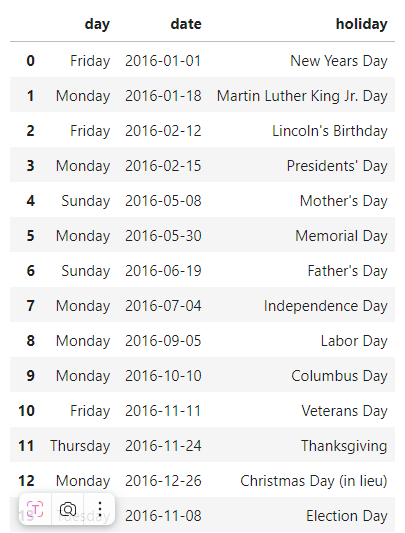

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [7]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
# ваш код здесь

# Функция добавляет признак праздничного дня на основе данных о праздниках   
# Parameters:
# trips_data (DataFrame): Таблица с данными о поездках
# holidays_data (DataFrame): Таблица с данными о праздничных днях   
# Returns:
# DataFrame: Таблица с добавленным признаком pickup_holiday

def add_holiday_features(trips_data, holidays_data):
    # Создаем копию данных для безопасности
    df = trips_data.copy()
    
    # Преобразуем столбец с праздниками в тип datetime и извлекаем дату
    holidays_data['date'] = pd.to_datetime(holidays_data['date']).dt.date
    
    # Создаем множество праздничных дат для быстрого поиска
    holiday_dates = set(holidays_data['date'])
    
    # Добавляем бинарный признак: 1 если поездка начата в праздничный день, 0 - иначе
    df['pickup_holiday'] = df['pickup_date'].apply(lambda x: 1 if x in holiday_dates else 0)
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_holiday_features(taxi_data, holiday_data)

# Рассчитываем медианную длительность поездки в праздничные дни
holiday_trips = taxi_data[taxi_data['pickup_holiday'] == 1]
median_holiday_duration = holiday_trips['trip_duration'].median()
print(f"Медианная длительность поездки в праздничные дни: {round(median_holiday_duration)} секунд")

Медианная длительность поездки в праздничные дни: 585 секунд


Теперь, когда мы разобрались с временными характеристиками, переходим к географическим.

В данных есть столбцы, содержащие информацию о широте и долготе. Из них можно извлечь очень много полезной информации.

Например, зная широту и долготу начальной и конечной точек маршрута, мы можем воспользоваться OSRM API.

OSRM (Open Source Routing Machine) (https://en.wikipedia.org/wiki/Open_Source_Routing_Machine) — это открытый бесплатный ресурс, который активно используется во многих сервисах, предполагающих построение кратчайшего маршрута. Он позволяет построить оптимальный кусочно-линейный путь из точки А в точку B, а также узнать его примерную длительность и длину. У данного сервиса есть API, с которым вы можете познакомиться в документации (https://www.thinkdatascience.com/post/2020-03-03-osrm/osrm/).

Проблема заключается в том, что, так как в наших данных содержится информация о более чем одном миллионе поездок, подгрузка данных с помощью API и их предобработка может занять несколько часов, а при слабом интернет-соединении — и дней. Поэтому мы заранее подготовили выгрузку данных из OSRM API для каждой поездки из тренировочной и тестовой выборок нашего набора данных.

Файлы с данными из OSRM для поездок из тренировочной таблицы вы можете найти здесь. Наборы данных представлены в табличном формате CSV. Нас будут интересовать только следующие столбцы:

- id — идентификатор поездки;
- total_distance — кратчайшее дорожное расстояние (в метрах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);
- total_travel_time — наименьшее время поездки (в секундах) из точки, в которой был включён счётчик, до точки, в которой счётчик был выключен (согласно OSRM);
- number_of_steps — количество дискретных шагов, которые должен выполнить водитель (поворот налево/поворот направо/ехать прямо и т. д.).

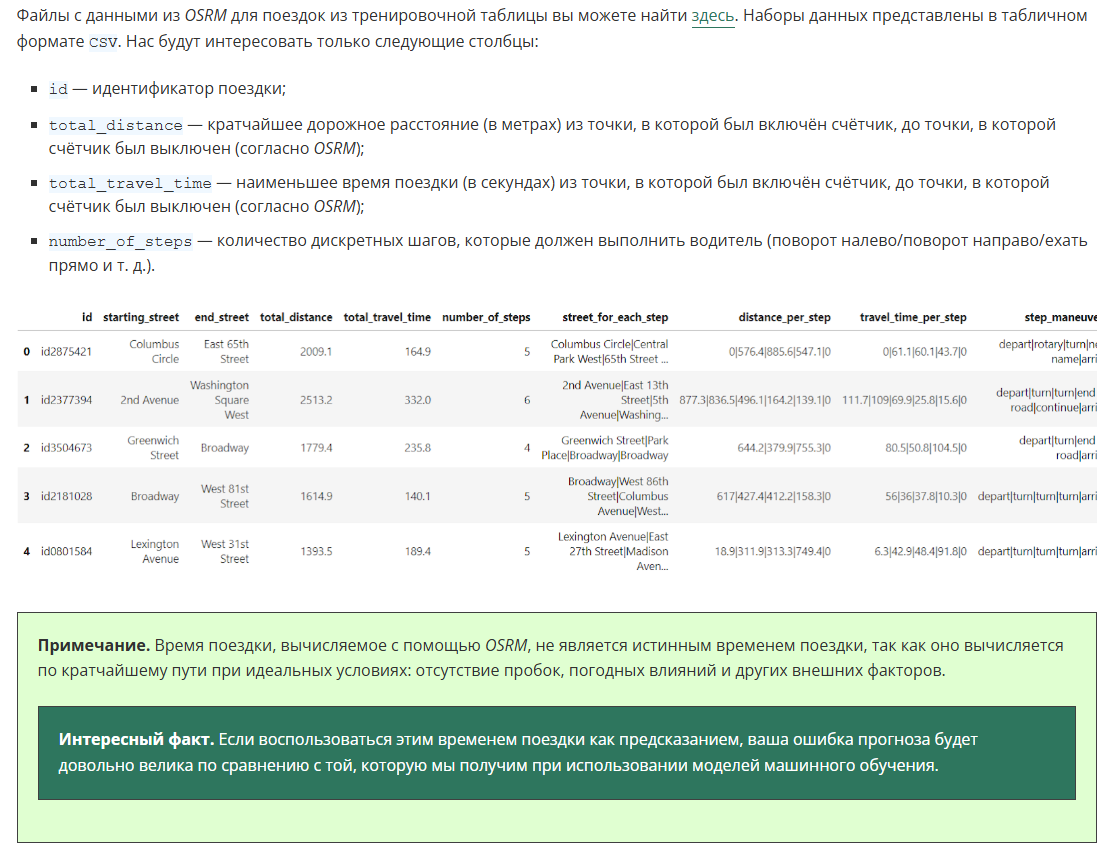

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [8]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')
osrm_data.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [9]:
# ваш код здесь

# Функция добавляет признаки из OSRM API к данным о поездках
# Parameters:
# trips_data (DataFrame): Таблица с данными о поездках
# osrm_data (DataFrame): Таблица с данными из OSRM API 
# Returns:
# DataFrame: Таблица с добавленными признаками из OSRM

def add_osrm_features(trips_data, osrm_data):
    # Создаем копию данных для безопасности
    df = trips_data.copy()
    
    # Выделяем необходимые столбцы из OSRM данных
    osrm_features = osrm_data[['id', 'total_distance', 'total_travel_time', 'number_of_steps']].copy()
    
    # Объединяем таблицы по столбцу id с типом left join
    df = df.merge(osrm_features, on='id', how='left')
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_osrm_features(taxi_data, osrm_data)

# а) Разница между медианной длительностью поездки и медианной из OSRM
median_trip_duration = taxi_data['trip_duration'].median()
median_osrm_duration = taxi_data['total_travel_time'].median()
duration_difference = median_trip_duration - median_osrm_duration
print(f"Медианная длительность поездки в исходных данных: {median_trip_duration:.1f} секунд")
print(f"Медианная длительность поездки из OSRM: {median_osrm_duration:.1f} секунд")
print(f"Разница: {round(duration_difference)} секунд")

# б) Количество пропусков в столбцах OSRM после объединения
osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
missing_counts = taxi_data[osrm_columns].isnull().sum()
rows_with_missing = taxi_data[osrm_columns].isnull().any(axis=1).sum()
print(f"\nПропуски в столбцах OSRM:")
for col in osrm_columns:
    print(f"{col}: {missing_counts[col]} пропусков")
print(f"\nКоличество строк с пропусками в OSRM столбцах: {rows_with_missing}")

Медианная длительность поездки в исходных данных: 662.0 секунд
Медианная длительность поездки из OSRM: 289.5 секунд
Разница: 372 секунд

Пропуски в столбцах OSRM:
total_distance: 1 пропусков
total_travel_time: 1 пропусков
number_of_steps: 1 пропусков

Количество строк с пропусками в OSRM столбцах: 1


С помощью географических характеристик можно извлечь ещё немного информации. Если рассматривать Землю как сферу, то, зная широту и долготу начальной и конечной точек маршрута, можно вычислить географическое расстояние между точками на сфере, а также узнать направление движения автомобиля.

Немного теории ↓

Введём в наш анализ расстояние по формуле гаверсинуса. https://www.geeksforgeeks.org/dsa/haversine-formula-to-find-distance-between-two-points-on-a-sphere/

Данная формула определяет кратчайшее расстояние между двумя точками на сфере, если известны широта и долгота каждой из точек. Геометрически это длина кратчайшей дуги, связывающей точки на сфере.

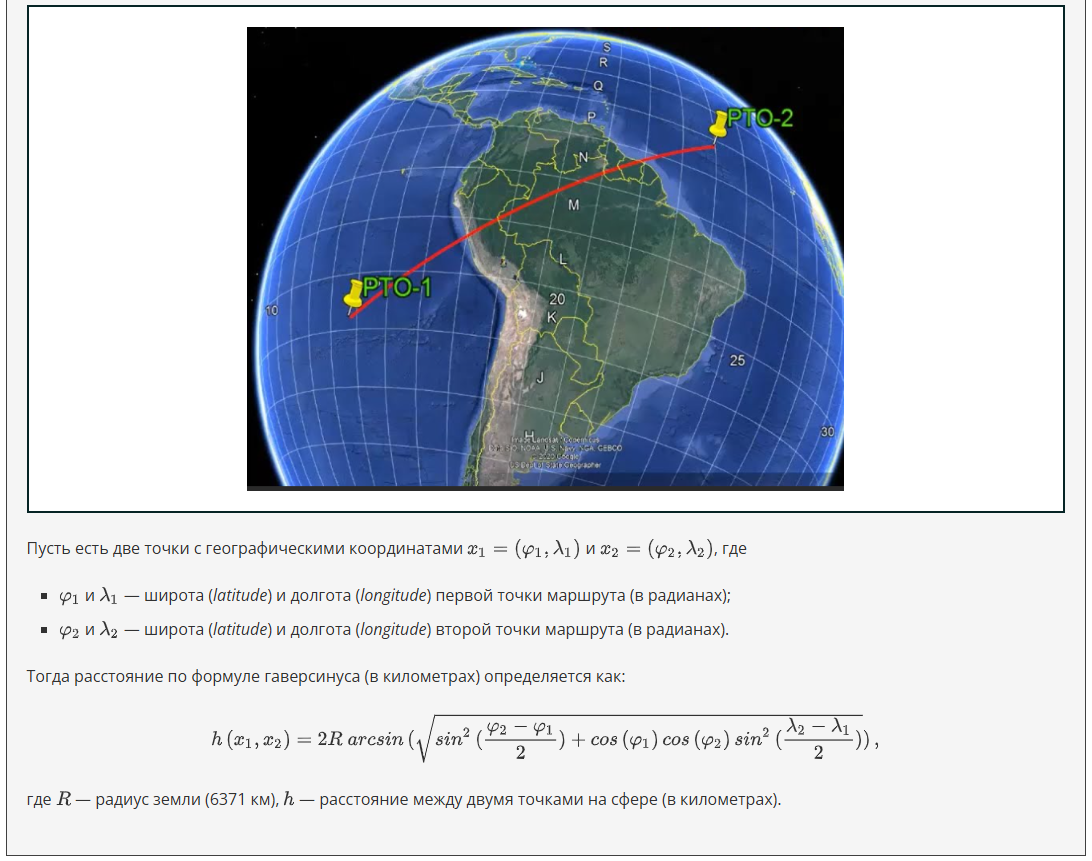

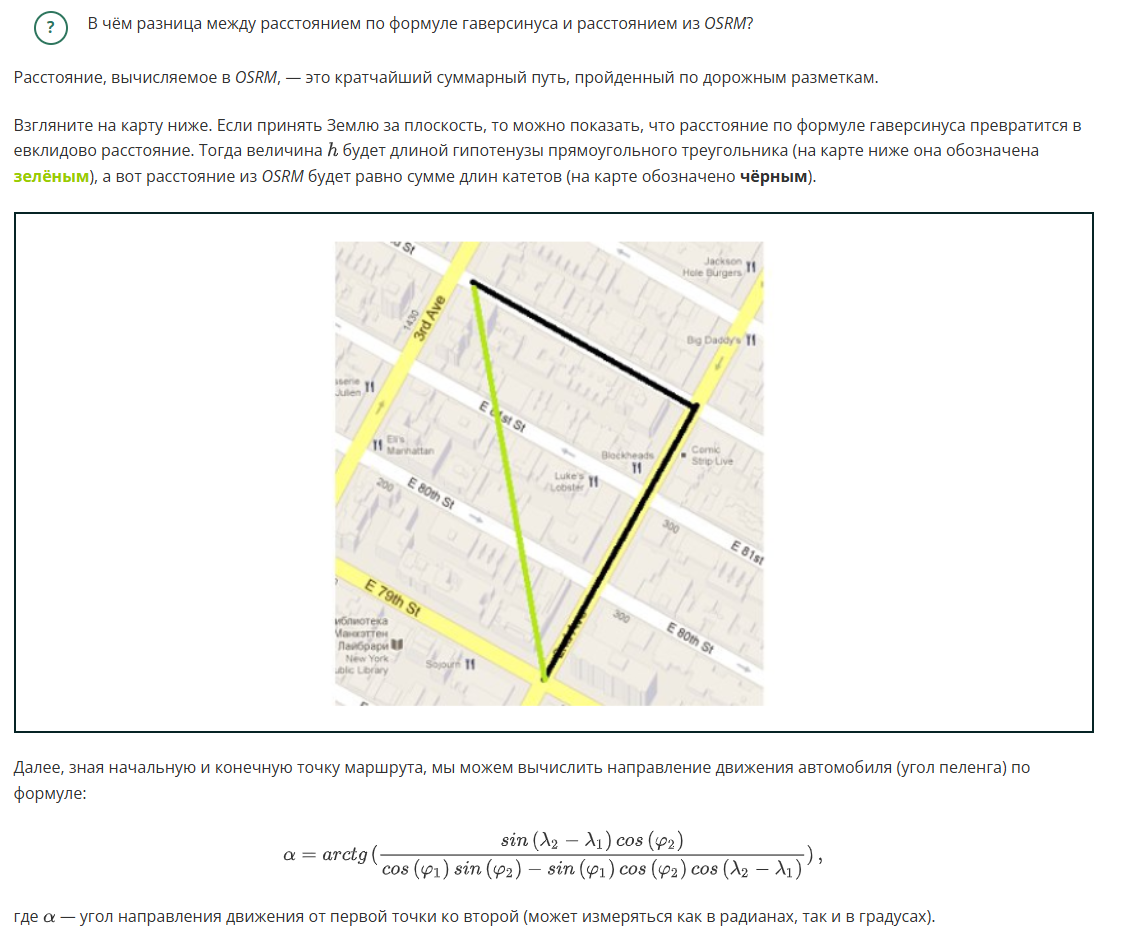

В интернете можно найти множество реализаций введённых нами формул на разных языках, в том числе на Python. Мы предлагаем вам воспользоваться следующими функциями:

- get_haversine_distance — функция для вычисления расстояния по формуле гаверсинуса (в километрах);
- get_angle_direction — функция для вычисления угла направления движения (в градусах).

Каждая из функций имеет четыре аргумента:

- lat1 и lng1 — векторы-столбцы с широтой и долготой первой точки;
- lat2 и lng2 — векторы-столбцы с широтой и долготой второй точки.

Теперь, когда у нас есть методика вычисления дополнительных географических признаков, мы можем перейти к их созданию ↓

In [10]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [11]:
# ваш код здесь

# Функция добавляет географические признаки на основе координат поездок
# Parameters:
# data (DataFrame): Таблица с данными о поездках
# Returns:
# DataFrame: Таблица с добавленными географическими признаками
def add_geographical_features(data):
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Вычисляем расстояние Хаверсина между точками начала и окончания поездки
    df['haversine_distance'] = get_haversine_distance(
        df['pickup_latitude'], 
        df['pickup_longitude'],
        df['dropoff_latitude'], 
        df['dropoff_longitude']
    )
    
    # Вычисляем направление движения (угол пеленга)
    df['direction'] = get_angle_direction(
        df['pickup_latitude'], 
        df['pickup_longitude'],
        df['dropoff_latitude'], 
        df['dropoff_longitude']
    )
    return df

# Применяем функцию к нашим данным
taxi_data = add_geographical_features(taxi_data)

# Вычисляем медианное расстояние Хаверсина в километрах
median_haversine_distance = taxi_data['haversine_distance'].median()
print(f"Медианное расстояние Хаверсина поездок: {median_haversine_distance:.2f} км")

Медианное расстояние Хаверсина поездок: 2.09 км


Следующая методика манипуляций с географическими данными — это применение кластеризации по географическим координатам. Идея заключается в том, чтобы сгруппировать все поездки в зависимости от координат начала и конца поездки с помощью методов кластеризации, тем самым добавив информацию о районах, в которых находятся точки старта и конца поездки.

→ Гипотеза состоит в том, что длительность поездки будет зависеть от того, к какому географическому кластеру будет принадлежать поездка.

В качестве метода кластеризации воспользуемся алгоритмом K-Means. Возьмём десять кластеров и обучим его на данных, сформированных из широты и долготы всех точек начала и конца поездок.

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [12]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь

# Функция добавляет географические кластеры к данным о поездках
# Parameters:
# data (DataFrame): Таблица с данными о поездках
# kmeans_model: Обученная модель кластеризации K-means  
# Returns:
# DataFrame: Таблица с добавленным столбцом geo_cluster

def add_cluster_features(data, kmeans_model):
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Подготавливаем координаты в том же формате, что использовался для обучения
    # Объединяем координаты начала и окончания поездок
    trip_coords = np.hstack((df[['pickup_latitude', 'pickup_longitude']].values,
                            df[['dropoff_latitude', 'dropoff_longitude']].values))
    
    # Предсказываем кластеры для каждой поездки
    clusters = kmeans_model.predict(trip_coords)
    
    # Добавляем предсказанные кластеры в DataFrame
    df['geo_cluster'] = clusters
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_cluster_features(taxi_data, kmeans)

# Анализируем распределение поездок по кластерам
cluster_counts = taxi_data['geo_cluster'].value_counts().sort_values()
min_cluster_size = cluster_counts.min()
min_cluster_id = cluster_counts.idxmin()

print(f"Количество поездок в наименьшем по размеру географическом кластере: {min_cluster_size}")
print(f"Номер наименьшего кластера: {min_cluster_id}")

Количество поездок в наименьшем по размеру географическом кластере: 2
Номер наименьшего кластера: 1


Другим важным фактором, потенциально влияющим на дорожное движение, является погода. Так, например, логично предположить, что снег и дождь могут затруднять движение и увеличивать время поездки.

Здесь вы можете найти набор данных, содержащий информацию о погодных условиях в Нью-Йорке в 2016 году. Датасет представлен в табличном формате CSV. Нас будут интересовать только следующие столбцы:
- time — дата измерения (с интервалом в час);
- temperature — температура;
- visibility — видимость;
- wind speed — средняя скорость ветра;
- precip — количество осадков;
- events — погодные явления: Rain — дождь, Snow — снег, Fog — туман, None — отсутствие погодных явлений.

In [13]:
weather_data = pd.read_csv('data/weather_data.csv')
weather_data.head()

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4
3,2015-12-31 05:00:00,7.2,5.9,NaN,0.86,1015.9,5.0,14.5,NW,7.4,0.0,0.0,NaN,Overcast,2015-12-31,5
4,2015-12-31 06:00:00,7.2,6.4,NaN,0.90,1016.2,5.6,11.3,West,5.6,0.0,0.0,NaN,Overcast,2015-12-31,6


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [14]:
# ваш код здесь

# Функция добавляет погодные признаки к данным о поездках
# Parameters:
# trips_data (DataFrame): Таблица с данными о поездках
# weather_data (DataFrame): Таблица с данными о погодных условиях    
# Returns:
# DataFrame: Таблица с добавленными погодными признаками
    
def add_weather_features(trips_data, weather_data):
    # Создаем копию данных для безопасности
    df = trips_data.copy()
    weather_df = weather_data.copy()
    
    # Найдем правильное название столбца с временем
    time_column = weather_df.columns[0]
    
    # Преобразуем время в погодных данных в datetime
    weather_df['datetime_parsed'] = pd.to_datetime(weather_df[time_column])
    
    # Создаем столбцы для объединения: дата и час
    weather_df['pickup_date'] = weather_df['datetime_parsed'].dt.date
    weather_df['pickup_hour'] = weather_df['datetime_parsed'].dt.hour
    
    # Найдем нужные столбцы с погодными данными
    weather_columns_mapping = {}
    target_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
    
    for target_col in target_columns:
        found_col = None
        for col in weather_df.columns:
            if target_col.lower().replace(' ', '') in col.lower().replace(' ', ''):
                found_col = col
                break
        if found_col:
            weather_columns_mapping[target_col] = found_col
    
    # Выбираем нужные столбцы из погодных данных и переименовываем их
    weather_features = weather_df[['pickup_date', 'pickup_hour']].copy()
    
    for target_name, source_name in weather_columns_mapping.items():
        weather_features[target_name] = weather_df[source_name]
    
    # Объединяем таблицы по дате и часу с типом left join
    df = df.merge(weather_features, on=['pickup_date', 'pickup_hour'], how='left')
    
    return df

# Применяем функцию к нашим данным
taxi_data = add_weather_features(taxi_data, weather_data)

# а) Сколько поездок было совершено в снежную погоду
# Ищем поездки, где в events содержится информация о снеге
if 'events' in taxi_data.columns:
    snow_trips = taxi_data[taxi_data['events'].str.contains('Snow', na=False, case=False)]
    num_snow_trips = len(snow_trips)
    print(f"\nКоличество поездок в снежную погоду: {num_snow_trips}")
else:
    print("\nСтолбец 'events' не найден в данных")
    num_snow_trips = 0

# б) Процент пропусков в погодных столбцах
weather_columns = ['temperature', 'visibility', 'wind speed', 'precip', 'events']
existing_weather_columns = [col for col in weather_columns if col in taxi_data.columns]

if existing_weather_columns:
    total_observations = len(taxi_data)
    
    # Подсчитываем пропуски в каждом столбце
    missing_counts = taxi_data[existing_weather_columns].isnull().sum()
    rows_with_missing = taxi_data[existing_weather_columns].isnull().any(axis=1).sum()
    
    print(f"\nПропуски в столбцах с погодными условиями:")
    for col in existing_weather_columns:
        missing_count = missing_counts[col]
        missing_percentage = (missing_count / total_observations) * 100
        print(f"{col}: {missing_count} пропусков ({missing_percentage:.2f}%)")


Количество поездок в снежную погоду: 13126

Пропуски в столбцах с погодными условиями:
temperature: 12032 пропусков (0.82%)
visibility: 12032 пропусков (0.82%)
wind speed: 12032 пропусков (0.82%)
precip: 12032 пропусков (0.82%)
events: 1387217 пропусков (95.10%)


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [15]:
# ваш код здесь

# Функция заполняет пропущенные значения в данных о поездках  
# Parameters:
# data (DataFrame): Таблица с данными о поездках
# Returns:
# DataFrame: Таблица с заполненными пропусками

def fill_null_weather_data(data):
    # Создаем копию данных для безопасности
    df = data.copy()
    
    # Столбцы с погодными условиями для заполнения медианой по дате
    weather_columns = ['temperature', 'visibility', 'wind speed', 'precip']
    
    # Заполняем пропуски в погодных столбцах медианными значениями по дате
    for col in weather_columns:
        if col in df.columns:
            # Заполняем медианой по группам pickup_date
            df[col] = df[col].fillna(
                df.groupby('pickup_date')[col].transform('median')
            )
            print(f"Заполнены пропуски в столбце {col}")
    
    # Заполняем пропуски в столбце events строкой 'None'
    if 'events' in df.columns:
        df['events'] = df['events'].fillna('None')
        print("Заполнены пропуски в столбце events")
    
    # Столбцы с информацией из OSRM API для заполнения общей медианой
    osrm_columns = ['total_distance', 'total_travel_time', 'number_of_steps']
    
    # Заполняем пропуски в OSRM столбцах медианными значениями по столбцам
    for col in osrm_columns:
        if col in df.columns:
            median_value = df[col].median()
            df[col] = df[col].fillna(median_value)
            print(f"Заполнены пропуски в столбце {col} значением {median_value}")
    
    return df

# Применяем функцию к нашим данным
taxi_data = fill_null_weather_data(taxi_data)

temperature_median = taxi_data['temperature'].median()
print(f"\nМедиана в столбце temperature после заполнения пропусков: {temperature_median:.1f}")



Заполнены пропуски в столбце temperature
Заполнены пропуски в столбце visibility
Заполнены пропуски в столбце wind speed
Заполнены пропуски в столбце precip
Заполнены пропуски в столбце events
Заполнены пропуски в столбце total_distance значением 2755.1
Заполнены пропуски в столбце total_travel_time значением 289.5
Заполнены пропуски в столбце number_of_steps значением 6.0

Медиана в столбце temperature после заполнения пропусков: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


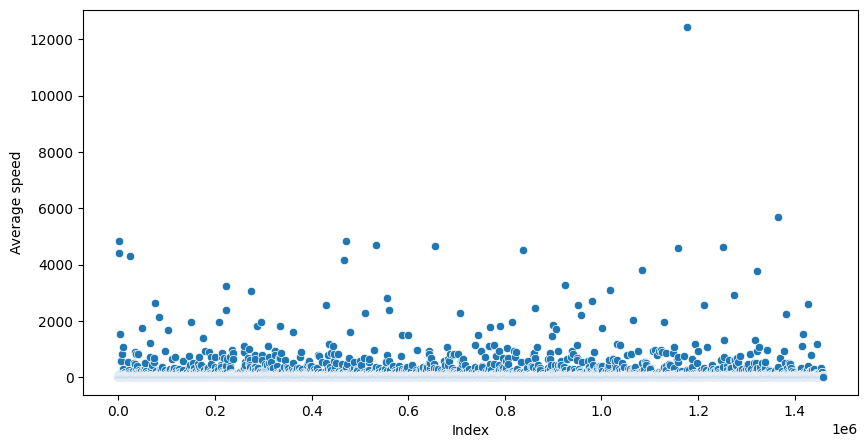

In [16]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [17]:
# ваш код здесь

# Исходное количество поездок
initial_count = len(taxi_data)

# 1. Находим и удаляем поездки, длительность которых превышает 24 часа
# 24 часа = 24 * 60 * 60 = 86400 секунд
duration_threshold = 24 * 60 * 60  # 86400 секунд

# Находим поездки с длительностью более 24 часов
long_duration_outliers = taxi_data[taxi_data['trip_duration'] > duration_threshold]
num_duration_outliers = len(long_duration_outliers)

print(f"Поездки длительностью более 24 часов: {num_duration_outliers}")

# Удаляем выбросы по длительности
taxi_data = taxi_data[taxi_data['trip_duration'] <= duration_threshold]
count_after_duration_filter = len(taxi_data)


# 2. Находим и удаляем поездки со средней скоростью более 300 км/ч
# Рассчитываем среднюю скорость: avg_speed = (total_distance / trip_duration) * 3.6
# где total_distance в метрах, trip_duration в секундах, результат в км/ч

# Вычисляем среднюю скорость
taxi_data['avg_speed'] = (taxi_data['total_distance'] / taxi_data['trip_duration']) * 3.6

# Находим поездки со скоростью более 300 км/ч
speed_threshold = 300  # км/ч
speed_outliers = taxi_data[taxi_data['avg_speed'] > speed_threshold]
num_speed_outliers = len(speed_outliers)
print(f"Поездки со средней скоростью более 300 км/ч: {num_speed_outliers}")

# Удаляем выбросы по скорости
taxi_data = taxi_data[taxi_data['avg_speed'] <= speed_threshold]
final_count = len(taxi_data)


Поездки длительностью более 24 часов: 4
Поездки со средней скоростью более 300 км/ч: 407


## 3. Разведывательный анализ данных (EDA)

✍ В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [18]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

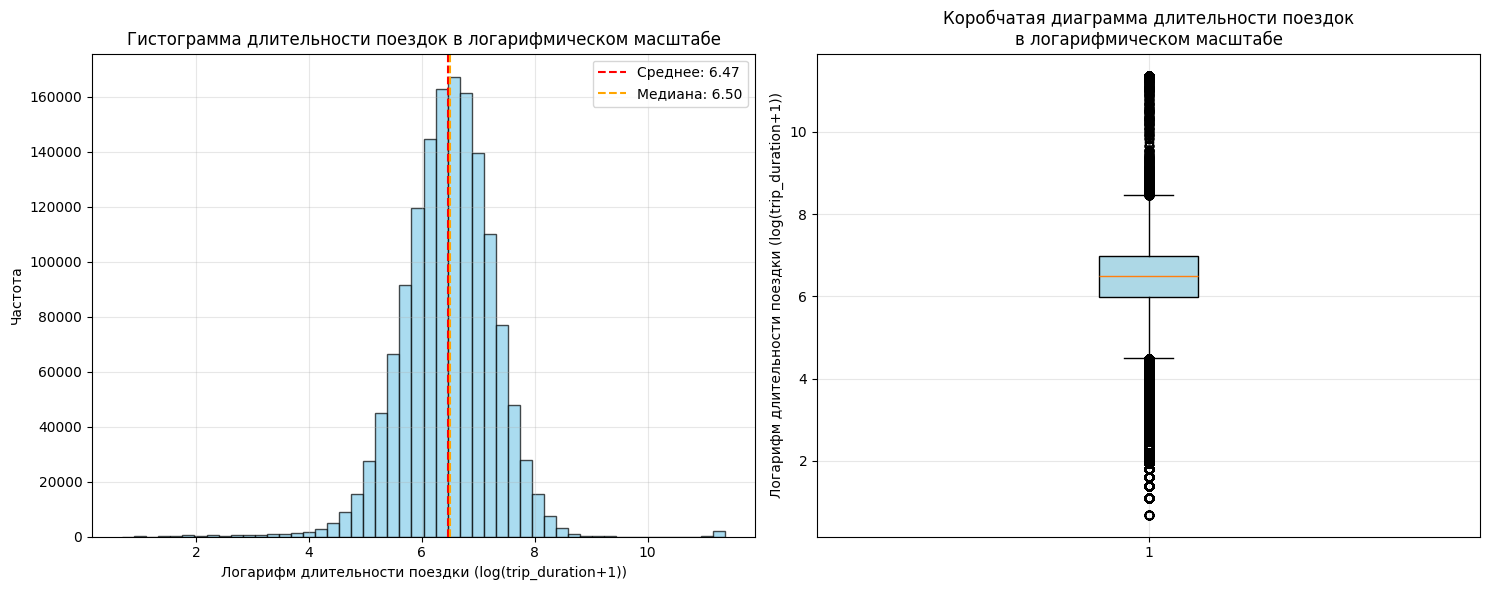

АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ:
Размер выборки для теста: 50000
Статистика теста Д'Агостино: 4405.6849
P-value: 0.0000000000
P-value (округленный до сотых): 0.00

Уровень значимости α = 0.05
P-value (0.00) < α (0.05)
ВЫВОД: Отвергаем нулевую гипотезу о нормальности
Распределение НЕ является нормальным

ОПИСАТЕЛЬНАЯ СТАТИСТИКА
Среднее значение: 6.4681
Медиана: 6.4983
Стандартное отклонение: 0.7925
Асимметрия (skewness): -0.2531
Эксцесс (kurtosis): 3.6601


In [19]:
# ваш код здесь

# Создаем фигуру с двумя подграфиками
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма длительности поездок в логарифмическом масштабе
ax1.hist(taxi_data['trip_duration_log'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Логарифм длительности поездки (log(trip_duration+1))')
ax1.set_ylabel('Частота')
ax1.set_title('Гистограмма длительности поездок в логарифмическом масштабе')
ax1.grid(True, alpha=0.3)

# Добавляем статистику на график
mean_log = taxi_data['trip_duration_log'].mean()
median_log = taxi_data['trip_duration_log'].median()
ax1.axvline(mean_log, color='red', linestyle='--', label=f'Среднее: {mean_log:.2f}')
ax1.axvline(median_log, color='orange', linestyle='--', label=f'Медиана: {median_log:.2f}')
ax1.legend()

# 2. Коробчатая диаграмма (boxplot)
box_plot = ax2.boxplot(taxi_data['trip_duration_log'], patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')
ax2.set_ylabel('Логарифм длительности поездки (log(trip_duration+1))')
ax2.set_title('Коробчатая диаграмма длительности поездок\nв логарифмическом масштабе')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Проверяем нормальность распределения с помощью теста Д'Агостино
from scipy.stats import normaltest

# Выполняем тест Д'Агостино
# Используем выборку для ускорения вычислений (тест может быть медленным на больших данных)
sample_size = min(50000, len(taxi_data))  # Берем выборку до 50,000 наблюдений
sample_data = taxi_data['trip_duration_log'].sample(n=sample_size, random_state=42)

statistic, p_value = normaltest(sample_data)

print("АНАЛИЗ НОРМАЛЬНОСТИ РАСПРЕДЕЛЕНИЯ:")
print(f"Размер выборки для теста: {sample_size}")
print(f"Статистика теста Д'Агостино: {statistic:.4f}")
print(f"P-value: {p_value:.10f}")
print(f"P-value (округленный до сотых): {p_value:.2f}")

# Интерпретация результата
alpha = 0.05
print(f"\nУровень значимости α = {alpha}")

if p_value < alpha:
    print(f"P-value ({p_value:.2f}) < α ({alpha})")
    print("ВЫВОД: Отвергаем нулевую гипотезу о нормальности")
    print("Распределение НЕ является нормальным")
else:
    print(f"P-value ({p_value:.2f}) >= α ({alpha})")
    print("ВЫВОД: Не можем отвергнуть нулевую гипотезу о нормальности")
    print("Распределение может считаться нормальным")

# Дополнительная описательная статистика
print(f"\nОПИСАТЕЛЬНАЯ СТАТИСТИКА")
print(f"Среднее значение: {taxi_data['trip_duration_log'].mean():.4f}")
print(f"Медиана: {taxi_data['trip_duration_log'].median():.4f}")
print(f"Стандартное отклонение: {taxi_data['trip_duration_log'].std():.4f}")
print(f"Асимметрия (skewness): {taxi_data['trip_duration_log'].skew():.4f}")
print(f"Эксцесс (kurtosis): {taxi_data['trip_duration_log'].kurtosis():.4f}")

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

Уникальные значения vendor_id:
vendor_id
1    678115
2    780118
Name: count, dtype: int64


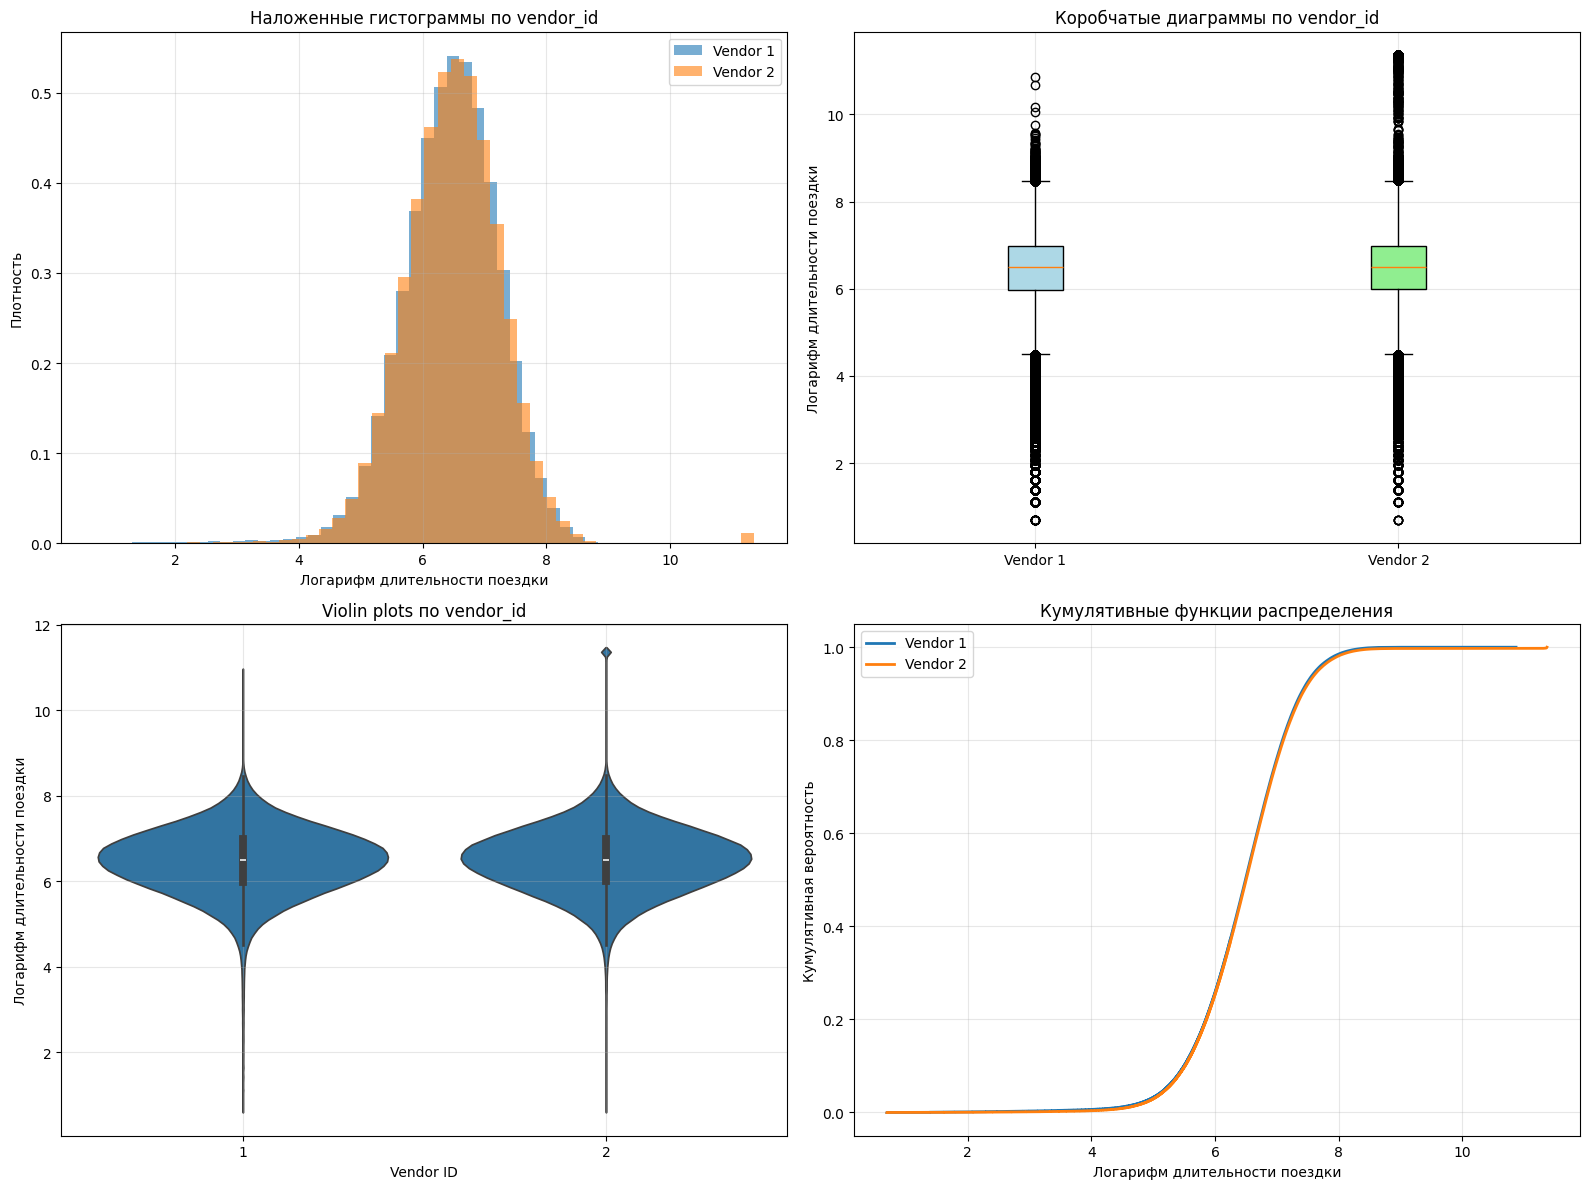


СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП:
   vendor_id   count    mean  median     std     min      max     q25     q75
0          1  678115  6.4515  6.4922  0.7840  0.6931  10.8662  5.9814  6.9745
1          2  780118  6.4826  6.5028  0.7995  0.6931  11.3667  5.9915  6.9884

РАЗНОСТИ МЕЖДУ ГРУППАМИ:
Разность средних значений: 0.0312
Разность медиан: 0.0106

СТАТИСТИЧЕСКИЕ ТЕСТЫ:
Тест Манна-Уитни:
  Статистика: 49315158.50
  P-value: 0.0934506928
T-тест:
  Статистика: -2.9336
  P-value: 0.0033546094


In [20]:
# ваш код здесь

# Проверяем уникальные значения vendor_id
print("Уникальные значения vendor_id:")
print(taxi_data['vendor_id'].value_counts().sort_index())

# Создаем комплексную визуализацию для сравнения распределений
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Гистограммы с наложением
ax1 = axes[0, 0]
for vendor in sorted(taxi_data['vendor_id'].unique()):
    vendor_data = taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log']
    ax1.hist(vendor_data, bins=50, alpha=0.6, label=f'Vendor {vendor}', density=True)

ax1.set_xlabel('Логарифм длительности поездки')
ax1.set_ylabel('Плотность')
ax1.set_title('Наложенные гистограммы по vendor_id')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Коробчатые диаграммы
ax2 = axes[0, 1]
vendor_groups = [taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log'] 
                for vendor in sorted(taxi_data['vendor_id'].unique())]
box_plot = ax2.boxplot(vendor_groups, tick_labels=[f'Vendor {v}' for v in sorted(taxi_data['vendor_id'].unique())], 
                      patch_artist=True)

# Раскрашиваем коробки
colors = ['lightblue', 'lightgreen']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_ylabel('Логарифм длительности поездки')
ax2.set_title('Коробчатые диаграммы по vendor_id')
ax2.grid(True, alpha=0.3)

# 3. Violin plots для более детального сравнения
ax3 = axes[1, 0]
import seaborn as sns
sns.violinplot(data=taxi_data, x='vendor_id', y='trip_duration_log', ax=ax3)
ax3.set_xlabel('Vendor ID')
ax3.set_ylabel('Логарифм длительности поездки')
ax3.set_title('Violin plots по vendor_id')
ax3.grid(True, alpha=0.3)

# 4. Кумулятивные распределения (CDF)
ax4 = axes[1, 1]
for vendor in sorted(taxi_data['vendor_id'].unique()):
    vendor_data = taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log']
    sorted_data = np.sort(vendor_data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax4.plot(sorted_data, y_values, label=f'Vendor {vendor}', linewidth=2)

ax4.set_xlabel('Логарифм длительности поездки')
ax4.set_ylabel('Кумулятивная вероятность')
ax4.set_title('Кумулятивные функции распределения')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистическое сравнение групп
print("\nСТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП:")

stats_comparison = []
for vendor in sorted(taxi_data['vendor_id'].unique()):
    vendor_data = taxi_data[taxi_data['vendor_id'] == vendor]['trip_duration_log']
    stats = {
        'vendor_id': vendor,
        'count': len(vendor_data),
        'mean': vendor_data.mean(),
        'median': vendor_data.median(),
        'std': vendor_data.std(),
        'min': vendor_data.min(),
        'max': vendor_data.max(),
        'q25': vendor_data.quantile(0.25),
        'q75': vendor_data.quantile(0.75)
    }
    stats_comparison.append(stats)
    
# Создаем DataFrame для удобного сравнения
stats_df = pd.DataFrame(stats_comparison)
print(stats_df.round(4))

# Вычисляем разности ключевых метрик
vendor_1_mean = stats_df[stats_df['vendor_id'] == 1]['mean'].iloc[0]
vendor_2_mean = stats_df[stats_df['vendor_id'] == 2]['mean'].iloc[0]
mean_diff = abs(vendor_2_mean - vendor_1_mean)

vendor_1_median = stats_df[stats_df['vendor_id'] == 1]['median'].iloc[0]
vendor_2_median = stats_df[stats_df['vendor_id'] == 2]['median'].iloc[0]
median_diff = abs(vendor_2_median - vendor_1_median)

print(f"\nРАЗНОСТИ МЕЖДУ ГРУППАМИ:")
print(f"Разность средних значений: {mean_diff:.4f}")
print(f"Разность медиан: {median_diff:.4f}")

# Статистический тест на различия между группами
from scipy.stats import mannwhitneyu, ttest_ind

vendor_1_data = taxi_data[taxi_data['vendor_id'] == 1]['trip_duration_log']
vendor_2_data = taxi_data[taxi_data['vendor_id'] == 2]['trip_duration_log']

# Тест Манна-Уитни (непараметрический)
# Используем выборки для ускорения
sample_size = 10000
vendor_1_sample = vendor_1_data.sample(n=min(sample_size, len(vendor_1_data)), random_state=42)
vendor_2_sample = vendor_2_data.sample(n=min(sample_size, len(vendor_2_data)), random_state=42)

statistic_mw, p_value_mw = mannwhitneyu(vendor_1_sample, vendor_2_sample, alternative='two-sided')

print(f"\nСТАТИСТИЧЕСКИЕ ТЕСТЫ:")
print(f"Тест Манна-Уитни:")
print(f"  Статистика: {statistic_mw:.2f}")
print(f"  P-value: {p_value_mw:.10f}")

# t-тест для сравнения средних (параметрический)
statistic_t, p_value_t = ttest_ind(vendor_1_sample, vendor_2_sample)
print(f"T-тест:")
print(f"  Статистика: {statistic_t:.4f}")
print(f"  P-value: {p_value_t:.10f}")


### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

Уникальные значения store_and_fwd_flag:
store_and_fwd_flag
N    1450192
Y       8041
Name: count, dtype: int64


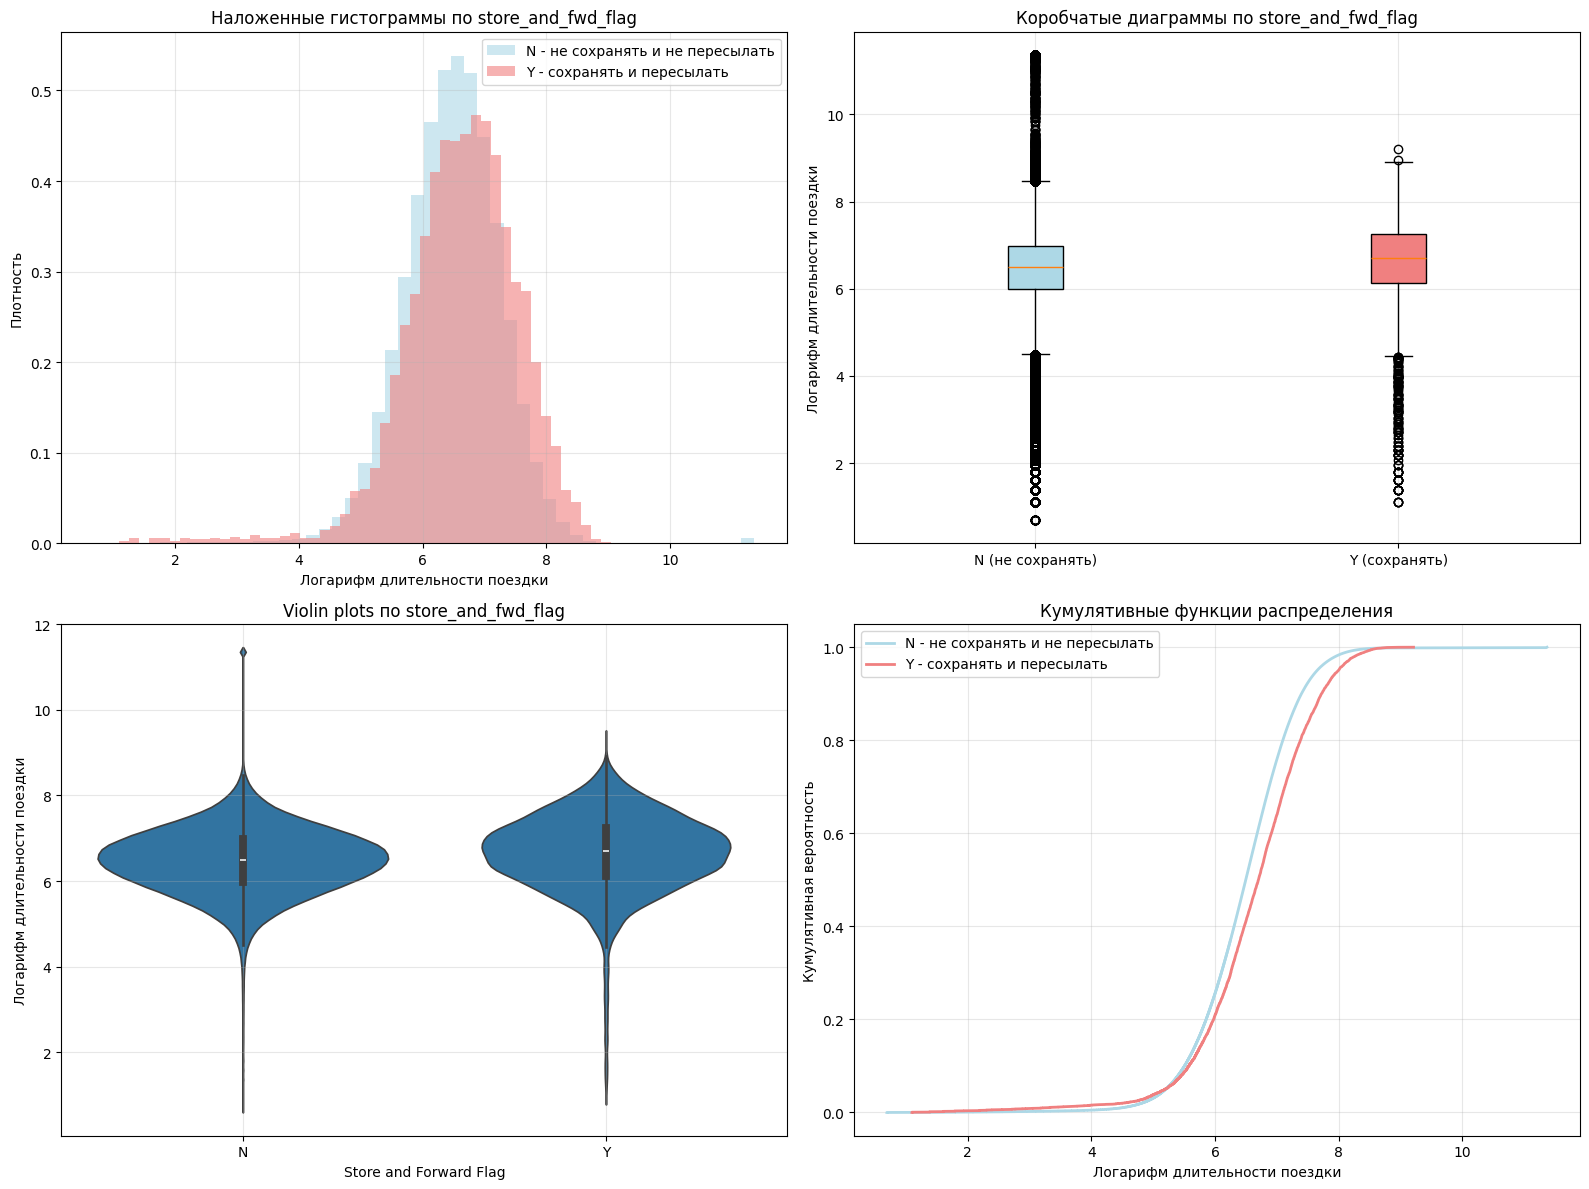


СТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП:
  store_and_fwd_flag             label    count    mean  median     std  \
0                  N  N (не сохранять)  1450192  6.4672  6.4968  0.7915   
1                  Y     Y (сохранять)     8041  6.6333  6.7020  0.9407   

      min      max     q25     q75  
0  0.6931  11.3667  5.9865  6.9801  
1  1.0986   9.2088  6.1247  7.2457  

РАЗНОСТИ МЕЖДУ ГРУППАМИ:
Разность средних значений: 0.1661
Разность медиан: 0.2052
Относительная разность средних: 2.57%
Относительная разность медиан: 3.16%

СТАТИСТИЧЕСКИЕ ТЕСТЫ:
Тест Манна-Уитни:
  Статистика: 34248746.50
  P-value: 0.0000000000
T-тест:
  Статистика: -13.4258
  P-value: 0.0000000000

ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
Уровень значимости: 0.05
✓ Статистически значимые различия между группами (p < 0.05)
✓ Практически значимые различия (разность > 0.05)


In [21]:
# ваш код здесь

# Проверяем уникальные значения store_and_fwd_flag
print("Уникальные значения store_and_fwd_flag:")
print(taxi_data['store_and_fwd_flag'].value_counts().sort_index())

# Создаем комплексную визуализацию для сравнения распределений
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Определяем группы для анализа
flag_groups = sorted(taxi_data['store_and_fwd_flag'].unique())
colors = ['lightblue', 'lightcoral']
labels = []

for flag in flag_groups:
    if flag == 'N':
        labels.append('N - не сохранять и не пересылать')
    else:
        labels.append('Y - сохранять и пересылать')

# 1. Гистограммы с наложением
ax1 = axes[0, 0]
for i, flag in enumerate(flag_groups):
    flag_data = taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log']
    ax1.hist(flag_data, bins=50, alpha=0.6, label=labels[i], density=True, color=colors[i])

ax1.set_xlabel('Логарифм длительности поездки')
ax1.set_ylabel('Плотность')
ax1.set_title('Наложенные гистограммы по store_and_fwd_flag')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Коробчатые диаграммы
ax2 = axes[0, 1]
flag_data_groups = [taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log'] 
                   for flag in flag_groups]
box_plot = ax2.boxplot(flag_data_groups, tick_labels=['N (не сохранять)', 'Y (сохранять)'], 
                      patch_artist=True)

# Раскрашиваем коробки
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_ylabel('Логарифм длительности поездки')
ax2.set_title('Коробчатые диаграммы по store_and_fwd_flag')
ax2.grid(True, alpha=0.3)

# 3. Violin plots для более детального сравнения
ax3 = axes[1, 0]
import seaborn as sns
sns.violinplot(data=taxi_data, x='store_and_fwd_flag', y='trip_duration_log', ax=ax3)
ax3.set_xlabel('Store and Forward Flag')
ax3.set_ylabel('Логарифм длительности поездки')
ax3.set_title('Violin plots по store_and_fwd_flag')
ax3.grid(True, alpha=0.3)

# 4. Кумулятивные распределения (CDF)
ax4 = axes[1, 1]
for i, flag in enumerate(flag_groups):
    flag_data = taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log']
    sorted_data = np.sort(flag_data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax4.plot(sorted_data, y_values, label=labels[i], linewidth=2, color=colors[i])

ax4.set_xlabel('Логарифм длительности поездки')
ax4.set_ylabel('Кумулятивная вероятность')
ax4.set_title('Кумулятивные функции распределения')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистическое сравнение групп
print("\nСТАТИСТИЧЕСКОЕ СРАВНЕНИЕ ГРУПП:")

stats_comparison = []
for flag in flag_groups:
    flag_data = taxi_data[taxi_data['store_and_fwd_flag'] == flag]['trip_duration_log']
    flag_label = 'N (не сохранять)' if flag == 'N' else 'Y (сохранять)'
    stats = {
        'store_and_fwd_flag': flag,
        'label': flag_label,
        'count': len(flag_data),
        'mean': flag_data.mean(),
        'median': flag_data.median(),
        'std': flag_data.std(),
        'min': flag_data.min(),
        'max': flag_data.max(),
        'q25': flag_data.quantile(0.25),
        'q75': flag_data.quantile(0.75)
    }
    stats_comparison.append(stats)
    
# Создаем DataFrame для удобного сравнения
stats_df = pd.DataFrame(stats_comparison)
print(stats_df.round(4))

# Вычисляем разности ключевых метрик
group_N_mean = stats_df[stats_df['store_and_fwd_flag'] == 'N']['mean'].iloc[0]
group_Y_mean = stats_df[stats_df['store_and_fwd_flag'] == 'Y']['mean'].iloc[0]
mean_diff = abs(group_Y_mean - group_N_mean)

group_N_median = stats_df[stats_df['store_and_fwd_flag'] == 'N']['median'].iloc[0]
group_Y_median = stats_df[stats_df['store_and_fwd_flag'] == 'Y']['median'].iloc[0]
median_diff = abs(group_Y_median - group_N_median)

print(f"\nРАЗНОСТИ МЕЖДУ ГРУППАМИ:")
print(f"Разность средних значений: {mean_diff:.4f}")
print(f"Разность медиан: {median_diff:.4f}")

# Относительные различия в процентах
mean_rel_diff = (mean_diff / min(group_N_mean, group_Y_mean)) * 100
median_rel_diff = (median_diff / min(group_N_median, group_Y_median)) * 100

print(f"Относительная разность средних: {mean_rel_diff:.2f}%")
print(f"Относительная разность медиан: {median_rel_diff:.2f}%")

# Статистический тест на различия между группами
from scipy.stats import mannwhitneyu, ttest_ind

group_N_data = taxi_data[taxi_data['store_and_fwd_flag'] == 'N']['trip_duration_log']
group_Y_data = taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']['trip_duration_log']

# Тест Манна-Уитни (непараметрический)
# Используем выборки для ускорения вычислений
sample_size = 10000
group_N_sample = group_N_data.sample(n=min(sample_size, len(group_N_data)), random_state=42)
group_Y_sample = group_Y_data.sample(n=min(sample_size, len(group_Y_data)), random_state=42)

if len(group_Y_sample) > 0:  # Проверяем, есть ли данные в группе Y
    statistic_mw, p_value_mw = mannwhitneyu(group_N_sample, group_Y_sample, alternative='two-sided')
    
    print(f"\nСТАТИСТИЧЕСКИЕ ТЕСТЫ:")
    print(f"Тест Манна-Уитни:")
    print(f"  Статистика: {statistic_mw:.2f}")
    print(f"  P-value: {p_value_mw:.10f}")
    
    # t-тест для сравнения средних (параметрический)
    statistic_t, p_value_t = ttest_ind(group_N_sample, group_Y_sample)
    print(f"T-тест:")
    print(f"  Статистика: {statistic_t:.4f}")
    print(f"  P-value: {p_value_t:.10f}")
    
    # Интерпретация результатов
    alpha = 0.05
    print(f"\nИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
    print(f"Уровень значимости: {alpha}")
    
    if p_value_mw < alpha:
        print("✓ Статистически значимые различия между группами (p < 0.05)")
        statistical_significance = True
    else:
        print("✗ Статистически незначимые различия между группами (p >= 0.05)")
        statistical_significance = False
else:
    print(f"\nПРИМЕЧАНИЕ:")
    print("Недостаточно данных в одной из групп для проведения статистических тестов")
    statistical_significance = False

# Практическая значимость
practical_threshold = 0.05  # 5% для логарифмической шкалы
if mean_diff > practical_threshold or median_diff > practical_threshold:
    print(f"✓ Практически значимые различия (разность > {practical_threshold})")
    practical_significance = True
else:
    print(f"✗ Практически незначимые различия (разность <= {practical_threshold})")
    practical_significance = False

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

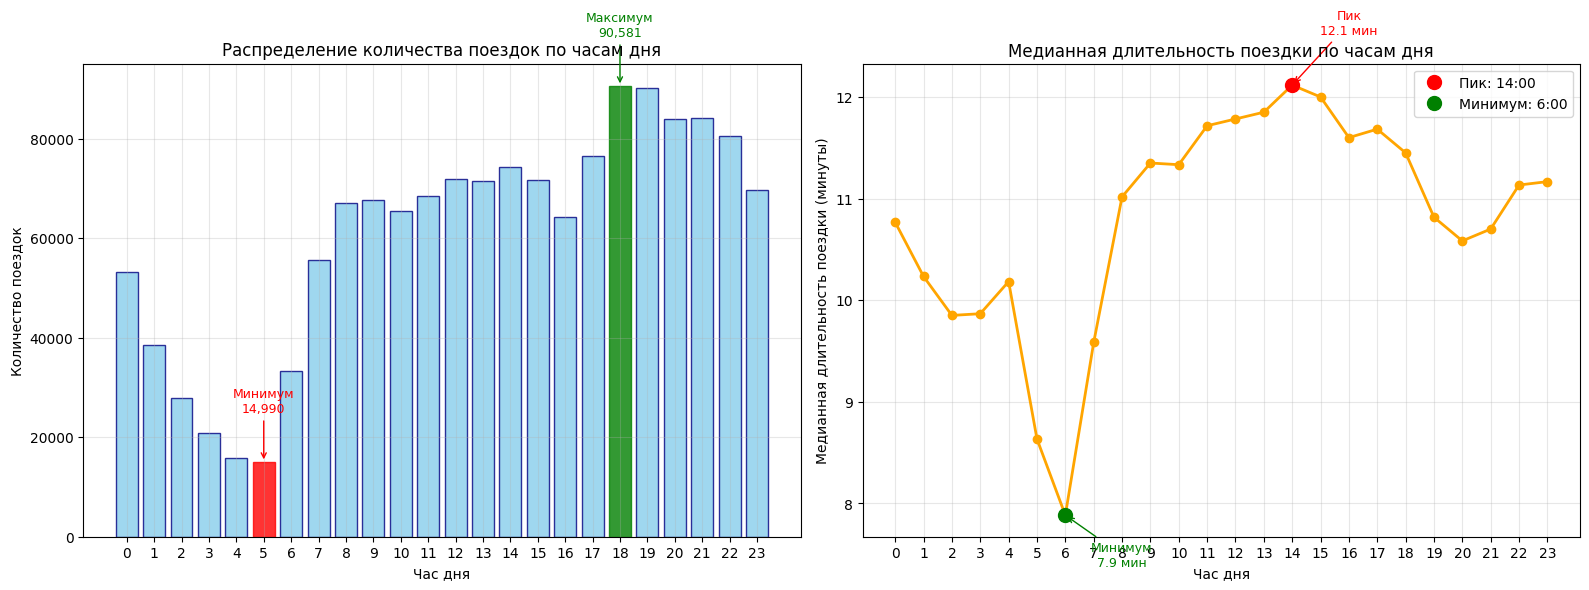

АНАЛИЗ ПО ЧАСАМ ДНЯ:

Таблица статистики по часам:
    pickup_hour  trip_count  median_duration_sec  median_duration_min
0             0       53234                646.0                10.77
1             1       38562                614.0                10.23
2             2       27966                591.0                 9.85
3             3       20888                592.0                 9.87
4             4       15784                611.0                10.18
5             5       14990                518.0                 8.63
6             6       33233                473.0                 7.88
7             7       55580                575.0                 9.58
8             8       67040                661.0                11.02
9             9       67646                681.0                11.35
10           10       65420                680.0                11.33
11           11       68455                703.0                11.72
12           12       71858            

In [22]:
# ваш код здесь

# Группируем данные по часам для анализа
hourly_stats = taxi_data.groupby('pickup_hour').agg({
    'id': 'count',  # Количество поездок
    'trip_duration': 'median'  # Медианная длительность
}).reset_index()

hourly_stats.columns = ['pickup_hour', 'trip_count', 'median_duration_sec']

# Преобразуем длительность в минуты для лучшего восприятия
hourly_stats['median_duration_min'] = hourly_stats['median_duration_sec'] / 60

# Создаем две визуализации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Распределение количества поездок в зависимости от часа дня
bars1 = ax1.bar(hourly_stats['pickup_hour'], hourly_stats['trip_count'], 
                color='skyblue', alpha=0.8, edgecolor='navy')
ax1.set_xlabel('Час дня')
ax1.set_ylabel('Количество поездок')
ax1.set_title('Распределение количества поездок по часам дня')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(0, 24))

# Находим час с минимальным количеством поездок
min_trips_hour = hourly_stats.loc[hourly_stats['trip_count'].idxmin(), 'pickup_hour']
min_trips_count = hourly_stats['trip_count'].min()

# Находим час с максимальным количеством поездок
max_trips_hour = hourly_stats.loc[hourly_stats['trip_count'].idxmax(), 'pickup_hour']
max_trips_count = hourly_stats['trip_count'].max()

# Выделяем минимальный и максимальный столбцы
bars1[min_trips_hour].set_color('red')
bars1[max_trips_hour].set_color('green')

# Добавляем аннотации
ax1.annotate(f'Минимум\n{min_trips_count:,}', 
             xy=(min_trips_hour, min_trips_count), 
             xytext=(min_trips_hour, min_trips_count + 10000),
             ha='center', fontsize=9, color='red',
             arrowprops=dict(arrowstyle='->', color='red'))

ax1.annotate(f'Максимум\n{max_trips_count:,}', 
             xy=(max_trips_hour, max_trips_count), 
             xytext=(max_trips_hour, max_trips_count + 10000),
             ha='center', fontsize=9, color='green',
             arrowprops=dict(arrowstyle='->', color='green'))

# 2. Зависимость медианной длительности поездки от часа дня
line = ax2.plot(hourly_stats['pickup_hour'], hourly_stats['median_duration_min'], 
                marker='o', linewidth=2, markersize=6, color='orange')
ax2.set_xlabel('Час дня')
ax2.set_ylabel('Медианная длительность поездки (минуты)')
ax2.set_title('Медианная длительность поездки по часам дня')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(0, 24))

# Находим час с максимальной медианной длительностью
max_duration_hour = hourly_stats.loc[hourly_stats['median_duration_min'].idxmax(), 'pickup_hour']
max_duration_value = hourly_stats['median_duration_min'].max()

# Находим час с минимальной медианной длительностью
min_duration_hour = hourly_stats.loc[hourly_stats['median_duration_min'].idxmin(), 'pickup_hour']
min_duration_value = hourly_stats['median_duration_min'].min()

# Выделяем экстремальные точки
ax2.plot(max_duration_hour, max_duration_value, 'ro', markersize=10, label=f'Пик: {max_duration_hour}:00')
ax2.plot(min_duration_hour, min_duration_value, 'go', markersize=10, label=f'Минимум: {min_duration_hour}:00')

# Добавляем аннотации
ax2.annotate(f'Пик\n{max_duration_value:.1f} мин', 
             xy=(max_duration_hour, max_duration_value), 
             xytext=(max_duration_hour + 2, max_duration_value + 0.5),
             ha='center', fontsize=9, color='red',
             arrowprops=dict(arrowstyle='->', color='red'))

ax2.annotate(f'Минимум\n{min_duration_value:.1f} мин', 
             xy=(min_duration_hour, min_duration_value), 
             xytext=(min_duration_hour + 2, min_duration_value - 0.5),
             ha='center', fontsize=9, color='green',
             arrowprops=dict(arrowstyle='->', color='green'))

ax2.legend()

plt.tight_layout()
plt.show()

# Выводим детальную статистику
print("АНАЛИЗ ПО ЧАСАМ ДНЯ:")
print(f"\nТаблица статистики по часам:")
print(hourly_stats.round(2))

print(f"\nОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ:")

# а) В какое время суток такси заказывают реже всего?
print(f"а) Такси заказывают реже всего в {min_trips_hour}:00 ({min_trips_count:,} поездок)")

# б) В какое время суток наблюдается пик медианной длительности поездок?
print(f"б) Пик медианной длительности поездок наблюдается в {max_duration_hour}:00 ({max_duration_value:.1f} минут)")

print(f"\nДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")

# Анализ пиковых и спокойных часов
peak_hours = hourly_stats.nlargest(3, 'trip_count')['pickup_hour'].tolist()
quiet_hours = hourly_stats.nsmallest(3, 'trip_count')['pickup_hour'].tolist()

print(f"Топ-3 самых загруженных часа: {peak_hours}")
print(f"Топ-3 самых спокойных часа: {quiet_hours}")

# Анализ длительности поездок
longest_trips_hours = hourly_stats.nlargest(3, 'median_duration_min')['pickup_hour'].tolist()
shortest_trips_hours = hourly_stats.nsmallest(3, 'median_duration_min')['pickup_hour'].tolist()

print(f"Топ-3 часа с самыми длинными поездками: {longest_trips_hours}")
print(f"Топ-3 часа с самыми короткими поездками: {shortest_trips_hours}")

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


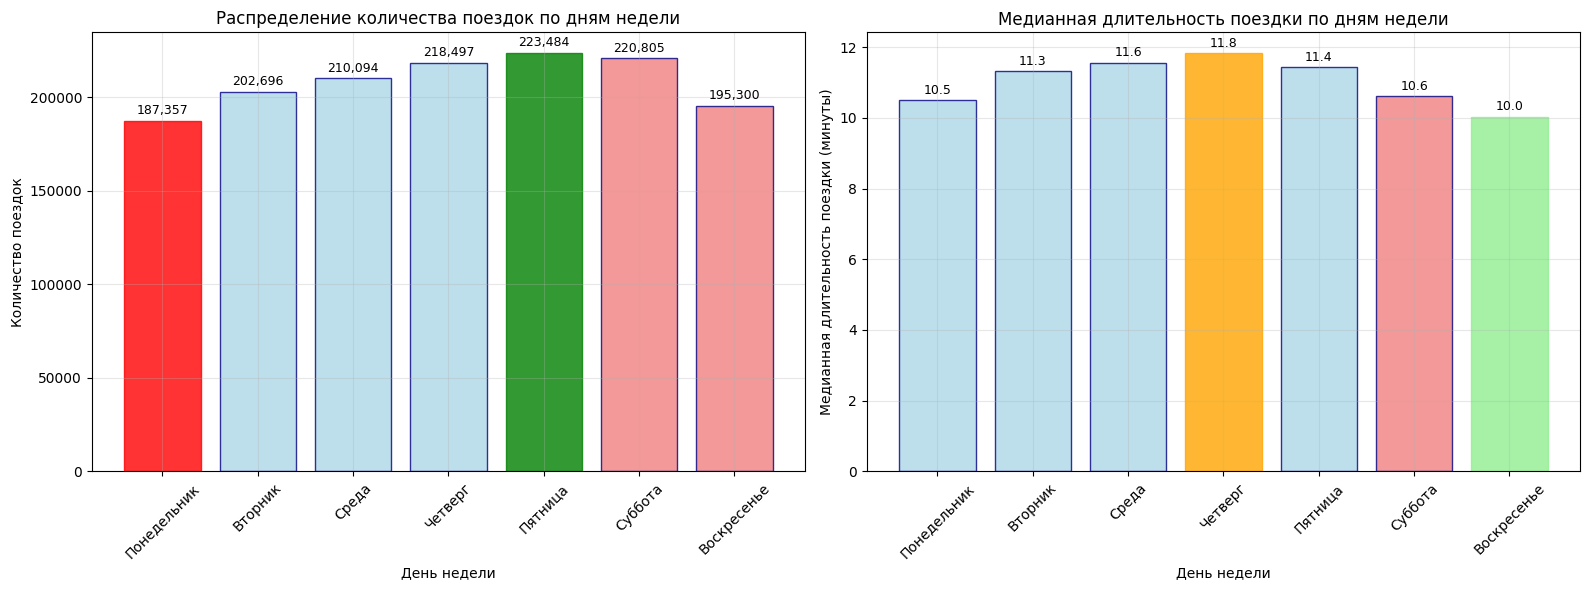

АНАЛИЗ ПО ДНЯМ НЕДЕЛИ:

Таблица статистики по дням недели:
День недели  Количество поездок  Медианная длительность (мин)
Понедельник              187357                         10.50
    Вторник              202696                         11.32
      Среда              210094                         11.57
    Четверг              218497                         11.83
    Пятница              223484                         11.43
    Суббота              220805                         10.62
Воскресенье              195300                         10.03

ОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ:
а) Больше всего поездок совершается в Пятница (223,484 поездок)
б) Наименьшая медианная длительность поездок в Воскресенье (10.0 минут)


In [23]:
# ваш код здесь

# Создаем названия дней недели для лучшего восприятия
day_names = {
    0: 'Понедельник',
    1: 'Вторник', 
    2: 'Среда',
    3: 'Четверг',
    4: 'Пятница',
    5: 'Суббота',
    6: 'Воскресенье'
}

# Группируем данные по дням недели для анализа
daily_stats = taxi_data.groupby('pickup_day_of_week').agg({
    'id': 'count',  # Количество поездок
    'trip_duration': 'median'  # Медианная длительность
}).reset_index()

daily_stats.columns = ['pickup_day_of_week', 'trip_count', 'median_duration_sec']

# Преобразуем длительность в минуты для лучшего восприятия
daily_stats['median_duration_min'] = daily_stats['median_duration_sec'] / 60

# Добавляем названия дней
daily_stats['day_name'] = daily_stats['pickup_day_of_week'].map(day_names)

# Создаем две визуализации
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Определяем цвета для рабочих и выходных дней
colors = ['lightblue' if day < 5 else 'lightcoral' for day in daily_stats['pickup_day_of_week']]

# 1. Распределение количества поездок в зависимости от дня недели
bars1 = ax1.bar(daily_stats['day_name'], daily_stats['trip_count'], 
                color=colors, alpha=0.8, edgecolor='navy')
ax1.set_xlabel('День недели')
ax1.set_ylabel('Количество поездок')
ax1.set_title('Распределение количества поездок по дням недели')
ax1.grid(True, alpha=0.3)

# Поворачиваем названия дней для лучшей читаемости
ax1.tick_params(axis='x', rotation=45)

# Находим день с максимальным и минимальным количеством поездок
max_trips_idx = daily_stats['trip_count'].idxmax()
min_trips_idx = daily_stats['trip_count'].idxmin()

max_trips_day = daily_stats.loc[max_trips_idx, 'day_name']
max_trips_count = daily_stats.loc[max_trips_idx, 'trip_count']

min_trips_day = daily_stats.loc[min_trips_idx, 'day_name']
min_trips_count = daily_stats.loc[min_trips_idx, 'trip_count']

# Выделяем экстремальные столбцы
bars1[max_trips_idx].set_color('green')
bars1[min_trips_idx].set_color('red')

# Добавляем значения на столбцы
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2000,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 2. Зависимость медианной длительности поездки от дня недели
bars2 = ax2.bar(daily_stats['day_name'], daily_stats['median_duration_min'], 
                color=colors, alpha=0.8, edgecolor='navy')
ax2.set_xlabel('День недели')
ax2.set_ylabel('Медианная длительность поездки (минуты)')
ax2.set_title('Медианная длительность поездки по дням недели')
ax2.grid(True, alpha=0.3)

# Поворачиваем названия дней
ax2.tick_params(axis='x', rotation=45)

# Находим день с максимальной и минимальной медианной длительностью
max_duration_idx = daily_stats['median_duration_min'].idxmax()
min_duration_idx = daily_stats['median_duration_min'].idxmin()

max_duration_day = daily_stats.loc[max_duration_idx, 'day_name']
max_duration_value = daily_stats.loc[max_duration_idx, 'median_duration_min']

min_duration_day = daily_stats.loc[min_duration_idx, 'day_name']
min_duration_value = daily_stats.loc[min_duration_idx, 'median_duration_min']

# Выделяем экстремальные столбцы
bars2[max_duration_idx].set_color('orange')
bars2[min_duration_idx].set_color('lightgreen')

# Добавляем значения на столбцы
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Выводим детальную статистику
print("АНАЛИЗ ПО ДНЯМ НЕДЕЛИ:")
print(f"\nТаблица статистики по дням недели:")
display_stats = daily_stats[['day_name', 'trip_count', 'median_duration_min']].copy()
display_stats.columns = ['День недели', 'Количество поездок', 'Медианная длительность (мин)']
print(display_stats.round(2).to_string(index=False))

print(f"\nОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ:")

# а) В какой день недели совершается больше всего поездок?
print(f"а) Больше всего поездок совершается в {max_trips_day} ({max_trips_count:,} поездок)")

# б) В какой день недели медианная длительность поездок наименьшая?
print(f"б) Наименьшая медианная длительность поездок в {min_duration_day} ({min_duration_value:.1f} минут)")


### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

Сводная таблица медианной длительности поездок (минуты):
Строки: часы дня (0-23), Столбцы: дни недели
                Пн     Вт     Ср     Чт     Пт     Сб     Вс
pickup_hour                                                 
0             9.97   9.85  10.02  10.15  10.82  11.42  11.25
1             9.45   9.73   9.22   9.40  10.00  10.67  10.72
2             9.42   9.42   9.07   9.60   9.53  10.17  10.07
3            10.00   9.47   9.57   9.73   9.63   9.85  10.13
4            10.67  10.01  10.27   9.92  10.57  10.17   9.98
5             8.65   7.58   7.47   8.00   8.87  10.52  10.57
6             7.70   7.68   7.72   7.85   7.93   8.47   9.23
7             9.58   9.77   9.88   9.98   9.63   8.02   7.90
8            11.20  11.72  11.73  12.02  11.48   8.15   7.67
9            11.75  12.58  12.37  12.87  12.38   8.50   7.83
10           11.57  12.97  13.13  12.87  12.40   9.03   8.43
11           11.70  13.43  13.48  13.40  12.58   9.65   9.18
12           11.53  13.06  13.34  13.32  12.

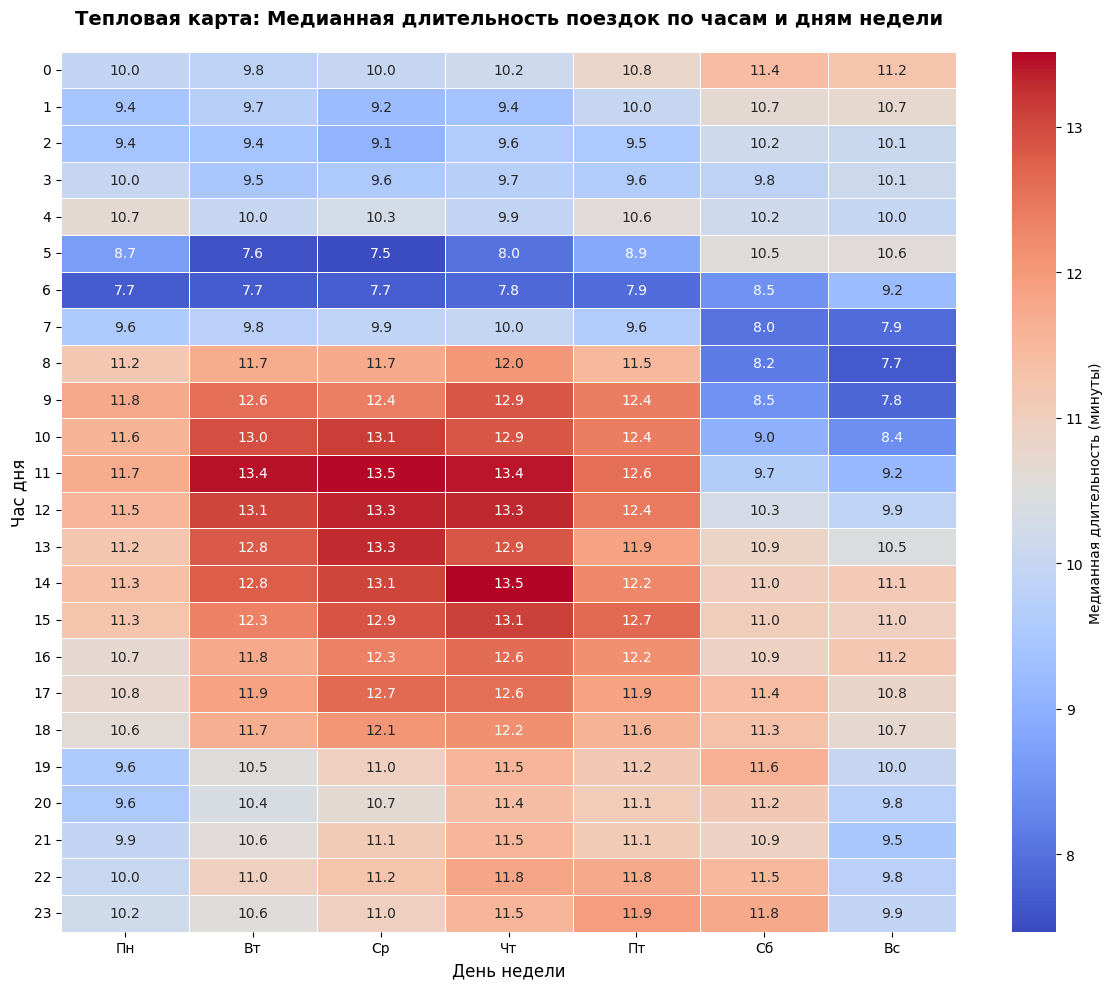

In [24]:
# ваш код здесь


# Создаем сводную таблицу с медианной длительностью поездок
pivot_table = taxi_data.pivot_table(
    index='pickup_hour',           # Строки - часы
    columns='pickup_day_of_week',  # Столбцы - дни недели
    values='trip_duration',        # Значения - длительность поездки
    aggfunc='median'               # Агрегирующая функция - медиана
)

# Преобразуем длительность из секунд в минуты для лучшего восприятия
pivot_table_minutes = pivot_table / 60

# Создаем названия дней недели для колонок
day_names = {
    0: 'Пн',  # Понедельник
    1: 'Вт',  # Вторник
    2: 'Ср',  # Среда
    3: 'Чт',  # Четверг
    4: 'Пт',  # Пятница
    5: 'Сб',  # Суббота
    6: 'Вс'   # Воскресенье
}

# Переименовываем колонки для лучшей читаемости
pivot_table_minutes.columns = [day_names[day] for day in pivot_table_minutes.columns]

print("Сводная таблица медианной длительности поездок (минуты):")
print("Строки: часы дня (0-23), Столбцы: дни недели")
print(pivot_table_minutes.round(2))

# Создаем тепловую карту
plt.figure(figsize=(12, 10))

# Используем seaborn для создания тепловой карты с палитрой coolwarm
heatmap = sns.heatmap(
    pivot_table_minutes,
    annot=True,                    # Показываем значения в ячейках
    fmt='.1f',                     # Формат чисел - 1 знак после запятой
    cmap='coolwarm',               # Цветовая палитра coolwarm
    cbar_kws={'label': 'Медианная длительность (минуты)'},  # Подпись к цветовой шкале
    linewidths=0.5,                # Толщина линий между ячейками
    square=False,                  # Не делаем ячейки квадратными
    center=None                    # Автоматический центр для палитры
)

plt.title('Тепловая карта: Медианная длительность поездок по часам и дням недели', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Час дня', fontsize=12)

# Настраиваем метки осей
plt.xticks(rotation=0)  # Дни недели горизонтально
plt.yticks(rotation=0)  # Часы горизонтально

# Улучшаем читаемость
plt.tight_layout()
plt.show()

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


Исходное количество поездок: 1,458,233
Поездки в пределах границ NYC: 1,438,802
Процент данных в границах: 98.7%
Используем все 1,438,802 поездок для визуализации


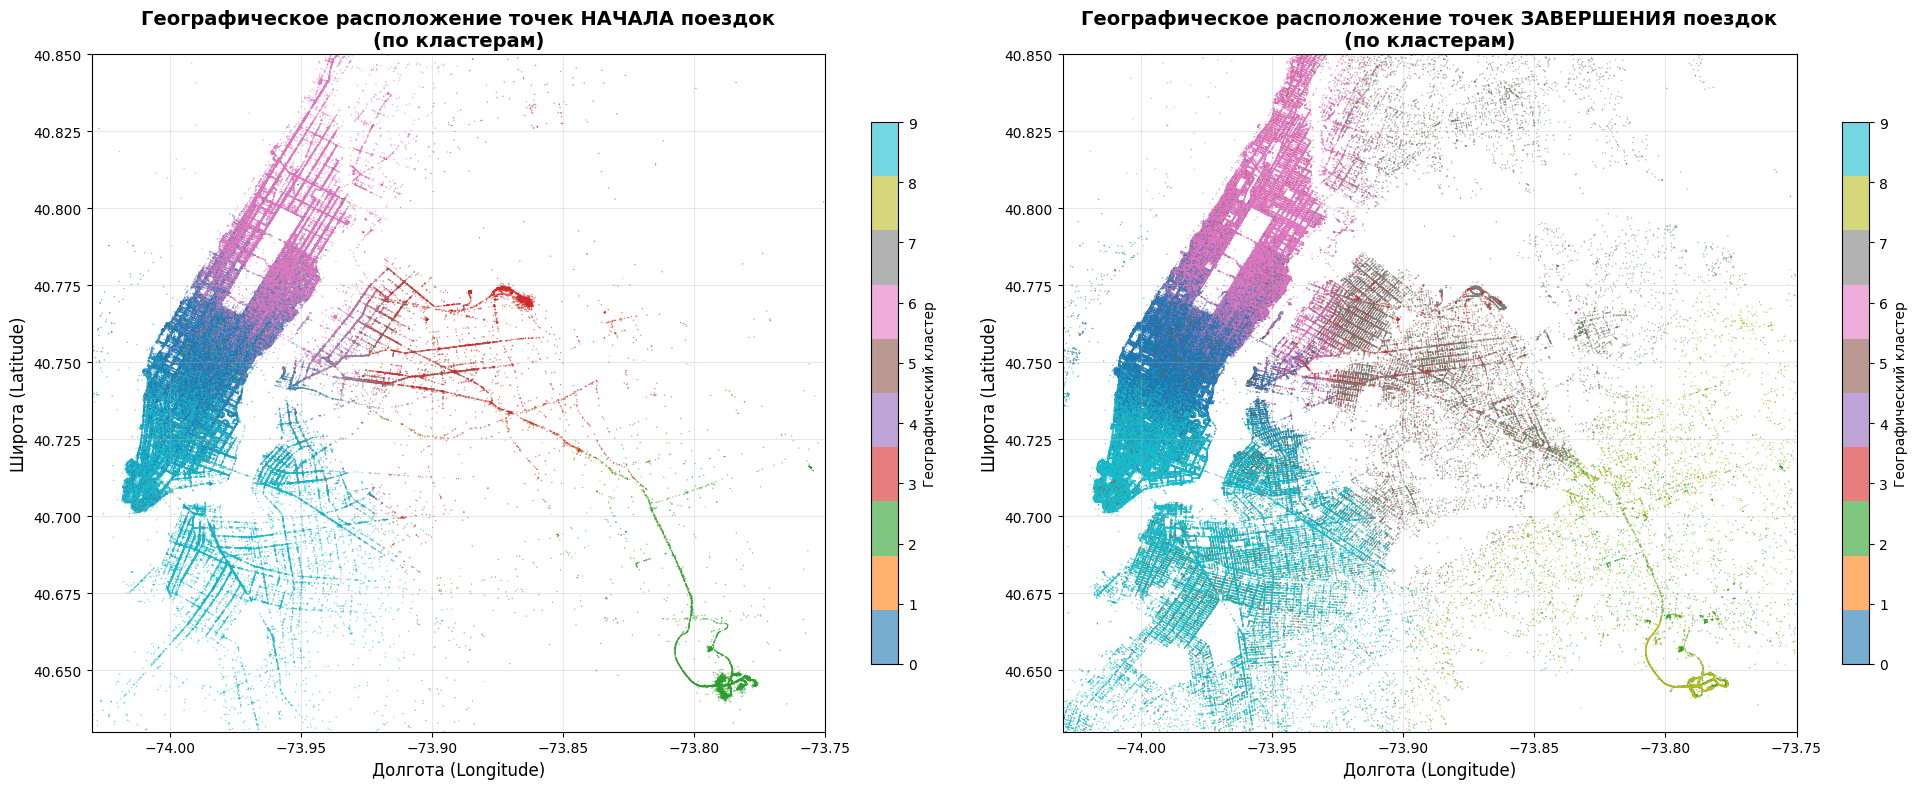


=== АНАЛИЗ ГЕОГРАФИЧЕСКОГО РАСПРЕДЕЛЕНИЯ ===

Распределение поездок по кластерам (точки начала):
  Кластер 0: 595,495 поездок (41.4%)
  Кластер 1: 0 поездок (0.0%)
  Кластер 2: 30,607 поездок (2.1%)
  Кластер 3: 39,740 поездок (2.8%)
  Кластер 4: 0 поездок (0.0%)
  Кластер 5: 0 поездок (0.0%)
  Кластер 6: 400,644 поездок (27.8%)
  Кластер 7: 41,838 поездок (2.9%)
  Кластер 8: 14,202 поездок (1.0%)
  Кластер 9: 316,276 поездок (22.0%)

=== ЦЕНТРЫ ГЕОГРАФИЧЕСКИХ КЛАСТЕРОВ ===
Средние координаты по кластерам:
Кластер | Pickup (Lng, Lat)     | Dropoff (Lng, Lat)
--------|----------------------|----------------------
   0    | (-73.9849, 40.7506) | (-73.9835, 40.7528)
   2    | (-73.7855, 40.6471) | (-73.944, 40.7333)
   3    | (-73.8732, 40.7691) | (-73.9642, 40.7482)
   6    | (-73.9665, 40.7746) | (-73.963, 40.7793)
   7    | (-73.9737, 40.7517) | (-73.885, 40.7654)
   8    | (-73.9697, 40.7521) | (-73.7919, 40.657)
   9    | (-73.9932, 40.7297) | (-73.9922, 40.7191)

=== АНАЛИЗ ПЛОТНОС

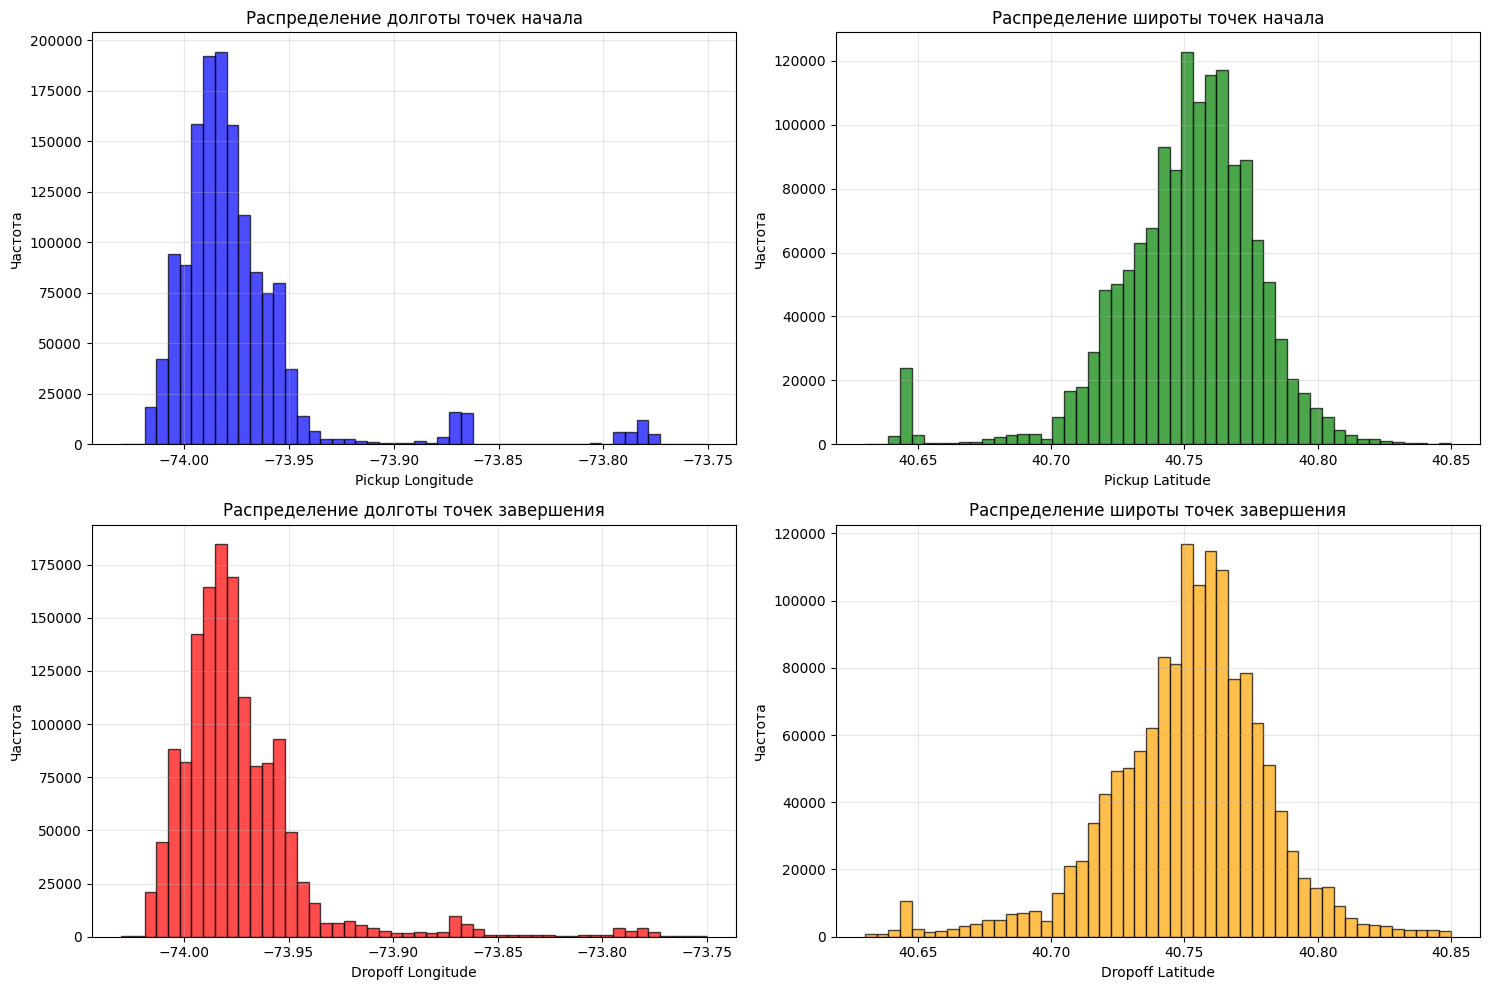


=== КАЧЕСТВО КЛАСТЕРИЗАЦИИ ===
Кластер 0: 595,495 точек, дисперсия: 0.000102
Кластер 2: 30,607 точек, дисперсия: 0.000126
Кластер 3: 39,740 точек, дисперсия: 0.000185
Кластер 6: 400,644 точек, дисперсия: 0.000106
Кластер 7: 41,838 точек, дисперсия: 0.000418
Кластер 8: 14,202 точек, дисперсия: 0.000841
Кластер 9: 316,276 точек, дисперсия: 0.000174

Общая внутрикластерная дисперсия: 0.001954
Средняя дисперсия на кластер: 0.000195


In [25]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь

# Фильтруем данные по границам Нью-Йорка
nyc_data = taxi_data[
    (taxi_data['pickup_longitude'] >= city_long_border[0]) & 
    (taxi_data['pickup_longitude'] <= city_long_border[1]) &
    (taxi_data['pickup_latitude'] >= city_lat_border[0]) & 
    (taxi_data['pickup_latitude'] <= city_lat_border[1]) &
    (taxi_data['dropoff_longitude'] >= city_long_border[0]) & 
    (taxi_data['dropoff_longitude'] <= city_long_border[1]) &
    (taxi_data['dropoff_latitude'] >= city_lat_border[0]) & 
    (taxi_data['dropoff_latitude'] <= city_lat_border[1])
].copy()

print(f"Исходное количество поездок: {len(taxi_data):,}")
print(f"Поездки в пределах границ NYC: {len(nyc_data):,}")
print(f"Процент данных в границах: {len(nyc_data)/len(taxi_data)*100:.1f}%")

# Используем всю выборку для полной визуализации
nyc_sample = nyc_data
print(f"Используем все {len(nyc_sample):,} поездок для визуализации")

# Создаем цветовую палитру для 10 кластеров
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Создаем две диаграммы рассеяния
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# 1. Диаграмма точек начала поездок (pickup)
scatter1 = ax1.scatter(
    nyc_sample['pickup_longitude'], 
    nyc_sample['pickup_latitude'],
    c=nyc_sample['geo_cluster'], 
    cmap='tab10',
    s=1,  # Маленький размер точек для наглядности
    alpha=0.6,
    edgecolors='none'
)

ax1.set_xlim(city_long_border)
ax1.set_ylim(city_lat_border)
ax1.set_xlabel('Долгота (Longitude)', fontsize=12)
ax1.set_ylabel('Широта (Latitude)', fontsize=12)
ax1.set_title('Географическое расположение точек НАЧАЛА поездок\n(по кластерам)', 
              fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Добавляем цветовую шкалу для первой диаграммы
cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.8)
cbar1.set_label('Географический кластер', fontsize=10)
cbar1.set_ticks(range(10))

# 2. Диаграмма точек завершения поездок (dropoff)
scatter2 = ax2.scatter(
    nyc_sample['dropoff_longitude'], 
    nyc_sample['dropoff_latitude'],
    c=nyc_sample['geo_cluster'], 
    cmap='tab10',
    s=1,  # Маленький размер точек для наглядности
    alpha=0.6,
    edgecolors='none'
)

ax2.set_xlim(city_long_border)
ax2.set_ylim(city_lat_border)
ax2.set_xlabel('Долгота (Longitude)', fontsize=12)
ax2.set_ylabel('Широта (Latitude)', fontsize=12)
ax2.set_title('Географическое расположение точек ЗАВЕРШЕНИЯ поездок\n(по кластерам)', 
              fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Добавляем цветовую шкалу для второй диаграммы
cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.8)
cbar2.set_label('Географический кластер', fontsize=10)
cbar2.set_ticks(range(10))

plt.tight_layout()
plt.show()

# Дополнительный анализ географического распределения
print("\n=== АНАЛИЗ ГЕОГРАФИЧЕСКОГО РАСПРЕДЕЛЕНИЯ ===")

# Статистика по кластерам для точек начала и завершения
pickup_cluster_counts = nyc_data['geo_cluster'].value_counts().sort_index()
print(f"\nРаспределение поездок по кластерам (точки начала):")
for cluster in range(10):
    count = pickup_cluster_counts.get(cluster, 0)
    percentage = (count / len(nyc_data)) * 100 if len(nyc_data) > 0 else 0
    print(f"  Кластер {cluster}: {count:,} поездок ({percentage:.1f}%)")

# Анализ центроидов кластеров
print(f"\n=== ЦЕНТРЫ ГЕОГРАФИЧЕСКИХ КЛАСТЕРОВ ===")
cluster_centers = nyc_data.groupby('geo_cluster').agg({
    'pickup_longitude': 'mean',
    'pickup_latitude': 'mean',
    'dropoff_longitude': 'mean', 
    'dropoff_latitude': 'mean'
}).round(4)

print("Средние координаты по кластерам:")
print("Кластер | Pickup (Lng, Lat)     | Dropoff (Lng, Lat)")
print("--------|----------------------|----------------------")
for cluster in range(10):
    if cluster in cluster_centers.index:
        pickup_lng = cluster_centers.loc[cluster, 'pickup_longitude']
        pickup_lat = cluster_centers.loc[cluster, 'pickup_latitude']
        dropoff_lng = cluster_centers.loc[cluster, 'dropoff_longitude']
        dropoff_lat = cluster_centers.loc[cluster, 'dropoff_latitude']
        print(f"   {cluster}    | ({pickup_lng}, {pickup_lat}) | ({dropoff_lng}, {dropoff_lat})")

# Анализ разброса внутри кластеров
print(f"\n=== АНАЛИЗ ПЛОТНОСТИ КЛАСТЕРОВ ===")
cluster_stats = nyc_data.groupby('geo_cluster').agg({
    'pickup_longitude': ['std', 'min', 'max'],
    'pickup_latitude': ['std', 'min', 'max']
}).round(4)

cluster_stats.columns = ['lng_std', 'lng_min', 'lng_max', 'lat_std', 'lat_min', 'lat_max']

print("Статистика разброса по кластерам (pickup точки):")
print("Кластер | Lng Std | Lat Std | Lng Range    | Lat Range")
print("--------|---------|---------|--------------|-------------")
for cluster in range(10):
    if cluster in cluster_stats.index:
        lng_std = cluster_stats.loc[cluster, 'lng_std']
        lat_std = cluster_stats.loc[cluster, 'lat_std']
        lng_range = cluster_stats.loc[cluster, 'lng_max'] - cluster_stats.loc[cluster, 'lng_min']
        lat_range = cluster_stats.loc[cluster, 'lat_max'] - cluster_stats.loc[cluster, 'lat_min']
        print(f"   {cluster}    |  {lng_std:.4f}  |  {lat_std:.4f}  |   {lng_range:.4f}   |   {lat_range:.4f}")

# Проверяем соответствие pickup и dropoff кластеров
print(f"\n=== АНАЛИЗ СООТВЕТСТВИЯ PICKUP И DROPOFF ===")

# Создаем кросс-таблицу кластеров начала и завершения поездок
# Для этого нужно определить кластер dropoff точек
# Предполагаем, что geo_cluster определен по pickup точкам

# Вычисляем расстояния между pickup и dropoff точками по кластерам
cluster_distances = nyc_data.groupby('geo_cluster').agg({
    'haversine_distance': ['mean', 'std', 'min', 'max']
}).round(2)

cluster_distances.columns = ['distance_mean', 'distance_std', 'distance_min', 'distance_max']

print("Статистика расстояний поездок по кластерам (км):")
print("Кластер | Среднее | Std Dev | Минимум | Максимум")
print("--------|---------|---------|---------|----------")
for cluster in range(10):
    if cluster in cluster_distances.index:
        mean_dist = cluster_distances.loc[cluster, 'distance_mean']
        std_dist = cluster_distances.loc[cluster, 'distance_std'] 
        min_dist = cluster_distances.loc[cluster, 'distance_min']
        max_dist = cluster_distances.loc[cluster, 'distance_max']
        print(f"   {cluster}    |  {mean_dist:6.2f}  |  {std_dist:6.2f}  |  {min_dist:6.2f}  |   {max_dist:6.2f}")

# Находим самые популярные маршруты между районами
print(f"\n=== ГРАНИЦЫ ВИЗУАЛИЗАЦИИ ===")
print(f"Longitude границы: {city_long_border}")
print(f"Latitude границы: {city_lat_border}")
print(f"Покрытие данных: {len(nyc_data)/len(taxi_data)*100:.1f}% от общего датасета")

# Выводим информацию о кластерах с наибольшей и наименьшей активностью
most_active = pickup_cluster_counts.idxmax()
least_active = pickup_cluster_counts.idxmin()

print(f"\nСамый активный кластер: {most_active} ({pickup_cluster_counts[most_active]:,} поездок)")
print(f"Наименее активный кластер: {least_active} ({pickup_cluster_counts[least_active]:,} поездок)")

ratio = pickup_cluster_counts[most_active] / pickup_cluster_counts[least_active]
print(f"Соотношение активности: {ratio:.1f}:1")

# Дополнительная визуализация - гистограммы распределения координат
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Распределение pickup longitude
ax1.hist(nyc_sample['pickup_longitude'], bins=50, alpha=0.7, color='blue', edgecolor='black')
ax1.set_xlabel('Pickup Longitude')
ax1.set_ylabel('Частота')
ax1.set_title('Распределение долготы точек начала')
ax1.grid(True, alpha=0.3)

# Распределение pickup latitude  
ax2.hist(nyc_sample['pickup_latitude'], bins=50, alpha=0.7, color='green', edgecolor='black')
ax2.set_xlabel('Pickup Latitude')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение широты точек начала')
ax2.grid(True, alpha=0.3)

# Распределение dropoff longitude
ax3.hist(nyc_sample['dropoff_longitude'], bins=50, alpha=0.7, color='red', edgecolor='black')
ax3.set_xlabel('Dropoff Longitude')
ax3.set_ylabel('Частота')
ax3.set_title('Распределение долготы точек завершения')
ax3.grid(True, alpha=0.3)

# Распределение dropoff latitude
ax4.hist(nyc_sample['dropoff_latitude'], bins=50, alpha=0.7, color='orange', edgecolor='black')
ax4.set_xlabel('Dropoff Latitude') 
ax4.set_ylabel('Частота')
ax4.set_title('Распределение широты точек завершения')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== КАЧЕСТВО КЛАСТЕРИЗАЦИИ ===")

# Оцениваем компактность кластеров
from scipy.spatial.distance import cdist

total_within_cluster_variance = 0
for cluster in range(10):
    cluster_data = nyc_data[nyc_data['geo_cluster'] == cluster]
    if len(cluster_data) > 1:
        coords = cluster_data[['pickup_longitude', 'pickup_latitude']].values
        center = coords.mean(axis=0)
        distances = cdist([center], coords)[0]
        variance = np.var(distances)
        total_within_cluster_variance += variance
        print(f"Кластер {cluster}: {len(cluster_data):,} точек, дисперсия: {variance:.6f}")

print(f"\nОбщая внутрикластерная дисперсия: {total_within_cluster_variance:.6f}")
print(f"Средняя дисперсия на кластер: {total_within_cluster_variance/10:.6f}")

⭐ Прекрасно! Вы справились с разведывательным анализом и уже кое-что знаете о ваших данных: вы понимаете, как длительность поездки зависит от времени суток и дня недели, а также посмотрели на географические кластеры.

Советуем не останавливаться на достигнутом и потратить ещё какое-то время на поиски разных интересных паттернов и зависимостей в данных. Запомните те факторы, которые кажутся вам хорошими претендентами на основных предикторов длительности поездки: уже скоро вы сможете проверить ваши догадки с помощью машинного обучения.

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [38]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 28)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'avg_speed', 'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [45]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,avg_speed,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,1.498521,99.970196,6,4.4,8.0,27.8,0.3,None,15.896176,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,None,13.646335,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,None,18.747119,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,None,14.932028,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,1.188588,179.473585,6,9.4,16.1,9.3,0.0,None,13.364690,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [46]:
# ваш код здесь

# Удаляем неинформативные колонки
train_data = train_data.drop(['id', 'dropoff_datetime'], axis=1)
train_data.shape

(1458233, 26)

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [47]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 24)


Теперь займёмся кодированием категориальных признаков. В наших данных к категориальным можно отнести следующие признаки:

- vendor_id;
- store_and_fwd_flag;
- pickup_day_of_week;
- geo_cluster;
- events.

Первые два (vendor_id и store_and_fwd_flag) из них являются бинарными (имеют два уникальных значения). Давайте их закодируем

### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [48]:
# ваш код здесь

# Кодирование признака vendor_id
# 0 если идентификатор равен 1, иначе 1
train_data['vendor_id'] = (train_data['vendor_id'] != 1).astype(int)

# Кодирование признака store_and_fwd_flag  
# 0 если флаг равен 'N', иначе 1
train_data['store_and_fwd_flag'] = (train_data['store_and_fwd_flag'] != 'N').astype(int)

# а) Рассчитываем среднее по закодированному столбцу vendor_id
vendor_id_mean = train_data['vendor_id'].mean()
print(f"а) Среднее значение закодированного vendor_id: {vendor_id_mean:.2f}")

# б) Рассчитываем среднее по закодированному столбцу store_and_fwd_flag
store_flag_mean = train_data['store_and_fwd_flag'].mean()
print(f"б) Среднее значение закодированного store_and_fwd_flag: {store_flag_mean:.3f}")

а) Среднее значение закодированного vendor_id: 0.53
б) Среднее значение закодированного store_and_fwd_flag: 0.006


Следующие три признака (pickup_day_of_week, geo_cluster, events) являются номинальными.  Для них отлично подойдёт однократное кодирование.

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [49]:
# дни недели += 1 (от 0 до 7)
train_data['pickup_day_of_week'] = train_data['pickup_day_of_week'] + 1
train_data['pickup_day_of_week'].describe()

count    1.458233e+06
mean     4.050360e+00
std      1.954017e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: pickup_day_of_week, dtype: float64

In [50]:
# ваш код здесь

from sklearn.preprocessing import OneHotEncoder

# Определяем столбцы для кодирования
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Извлекаем данные для кодирования
data_to_encode = train_data[columns_to_change]

# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Обучаем кодировщик и трансформируем данные
data_onehot_array = one_hot_encoder.fit_transform(data_to_encode)

# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)

# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot_array.toarray(), columns=column_names)

print(f"\nСгенерированные столбцы:")
for i, col_name in enumerate(column_names):
    print(f"  {i+1:2d}. {col_name}")

print('Shape of data:  {}'.format(data_onehot.shape))


Сгенерированные столбцы:
   1. pickup_day_of_week_1
   2. pickup_day_of_week_2
   3. pickup_day_of_week_3
   4. pickup_day_of_week_4
   5. pickup_day_of_week_5
   6. pickup_day_of_week_6
   7. pickup_day_of_week_7
   8. geo_cluster_0
   9. geo_cluster_1
  10. geo_cluster_2
  11. geo_cluster_3
  12. geo_cluster_4
  13. geo_cluster_5
  14. geo_cluster_6
  15. geo_cluster_7
  16. geo_cluster_8
  17. geo_cluster_9
  18. events_Fog
  19. events_None
  20. events_Rain
  21. events_Snow
Shape of data:  (1458233, 21)


Добавим полученную таблицу с закодированными признаками:

In [51]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 42)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [52]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Далее нам необходимо определить тип валидации — схему, по которой мы будем оценивать качество построенных моделей. Так как наш набор данных довольно большой (почти 1.5 миллиона наблюдений), то мы свободно можем использовать hold-out-валидацию. Использование k-fold-валидации и тем более leave-one-out-валидации при таком объёме данных будет избыточным и времязатратным.

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [53]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [54]:
# ваш код здесь

from sklearn.feature_selection import SelectKBest, f_regression

# Создаем селектор для отбора 25 лучших признаков
k_best_selector = SelectKBest(score_func=f_regression, k=25)

# Обучаем селектор на обучающей выборке
print(f"\nОбучаем SelectKBest для отбора 25 лучших признаков...")
X_train_selected = k_best_selector.fit_transform(X_train, y_train_log)

# Получаем информацию о отобранных признаках
selected_features_mask = k_best_selector.get_support()
selected_features_names = X_train.columns[selected_features_mask].tolist()
selected_features_scores = k_best_selector.scores_[selected_features_mask]

# Создаем DataFrame с результатами для лучшей визуализации
results_df = pd.DataFrame({
    'feature_name': selected_features_names,
    'f_score': selected_features_scores
}).sort_values('f_score', ascending=False)

print(f"\n=== СПИСОК ОТОБРАННЫХ ПРИЗНАКОВ (по убыванию важности) ===")
print(f"{'Ранг':<4} {'F-статистика':<15} {'Название признака'}")
print("-" * 60)
for i, (idx, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i:<4} {row['f_score']:<15.2f} {row['feature_name']}")


# Применяем трансформацию к валидационной выборке
X_valid_selected = k_best_selector.transform(X_valid)
print(f"✓ Валидационная выборка трансформирована: {X_valid_selected.shape}")



Обучаем SelectKBest для отбора 25 лучших признаков...

=== СПИСОК ОТОБРАННЫХ ПРИЗНАКОВ (по убыванию важности) ===
Ранг F-статистика    Название признака
------------------------------------------------------------
1    955479.07       total_travel_time
2    655929.43       total_distance
3    611337.58       number_of_steps
4    581670.76       haversine_distance
5    43889.69        geo_cluster_2
6    31240.07        geo_cluster_6
7    30832.20        geo_cluster_7
8    28339.01        geo_cluster_8
9    28106.95        geo_cluster_3
10   23435.43        pickup_latitude
11   15850.07        dropoff_latitude
12   14829.63        pickup_longitude
13   6367.12         dropoff_longitude
14   3773.15         geo_cluster_0
15   3266.40         temperature
16   1943.67         pickup_day_of_week_7
17   1546.82         pickup_hour
18   959.21          pickup_day_of_week_4
19   609.27          pickup_holiday
20   606.63          pickup_day_of_week_6
21   583.53          pickup_day_of_week_3
2

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


Остался финальный шаг перед построением моделей. Так как мы будем использовать различные модели, в том числе те, в которых заложены численные методы оптимизации, давайте заранее позаботимся о масштабировании факторов. 

Примечание. Есть разные варианты масштабирования. Мы будем использовать min-max-нормализацию. Помните, что нормализация требуется для предикторов, а не для целевой переменной.

### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [55]:
# выберем только отобранные признаки (перезапишем из эталонного задания)
selected_features_names = [
    'vendor_id',
    'passenger_count',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'store_and_fwd_flag',
    'pickup_hour',
    'pickup_holiday',
    'total_distance',
    'total_travel_time',
    'number_of_steps',
    'haversine_distance',
    'temperature',
    'pickup_day_of_week_1',
    'pickup_day_of_week_6',
    'pickup_day_of_week_7',
    'pickup_day_of_week_4',
    'pickup_day_of_week_2',
    'pickup_day_of_week_3',
    'geo_cluster_1',
    'geo_cluster_3',
    'geo_cluster_5',
    'geo_cluster_7',
    'geo_cluster_9'
    ]

X_train_selected = X_train[selected_features_names]
X_valid_selected = X_valid[selected_features_names]

In [56]:
# ваш код здесь

from sklearn.preprocessing import MinMaxScaler

# Создаем нормализатор MinMaxScaler
scaler = MinMaxScaler()

# Обучаем нормализатор ТОЛЬКО на обучающей выборке
scaler.fit(X_train_selected)

# Трансформируем обучающую выборку
X_train_scaled = scaler.transform(X_train_selected)

# Трансформируем валидационную выборку (используя параметры, выученные на обучающей)
X_valid_scaled = scaler.transform(X_valid_selected)

# Ответ на вопрос задания: среднее для первого предиктора из валидационной выборки
first_predictor_mean = X_valid_scaled[:, 0].mean()

print(f"\nОТВЕТ НА ВОПРОС ЗАДАНИЯ:")
print(f"Среднее арифметическое первого предиктора из валидационной выборки:")
print(f"  Точное значение: {first_predictor_mean}")



ОТВЕТ НА ВОПРОС ЗАДАНИЯ:
Среднее арифметическое первого предиктора из валидационной выборки:
  Точное значение: 0.5354341180797852


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [60]:
# ваш код здесь

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Создаем модель линейной регрессии с параметрами по умолчанию
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_log)

print(f"  - Количество признаков: {lr_model.n_features_in_}")
print(f"  - Intercept (свободный член): {lr_model.intercept_:.6f}")
print(f"  - Коэффициенты (первые 5): {lr_model.coef_[:5]}")

# Делаем предсказания на обеих выборках
y_train_pred_log = lr_model.predict(X_train_scaled)
y_valid_pred_log = lr_model.predict(X_valid_scaled)

print(f"Предсказания получены:")
print(f"  - Обучающая выборка: {y_train_pred_log.shape}")
print(f"  - Валидационная выборка: {y_valid_pred_log.shape}")

# Вычисляем RMSLE (RMSE для логарифмированных значений)
print(f"\nРАСЧЕТ МЕТРИКИ MSE:")
# Поскольку мы уже работаем с логарифмированными значениями, достаточно вычислить RMSE
train_mse = mean_squared_error(y_train_log, y_train_pred_log)
valid_mse = mean_squared_error(y_valid_log, y_valid_pred_log)

train_rmsle = np.sqrt(train_mse)
valid_rmsle = np.sqrt(valid_mse)

print(f"MSE на обучающей выборке: {train_mse:.6f}")
print(f"MSE на валидационной выборке: {valid_mse:.6f}")

# Расчет RMSE (среднеквадратичная ошибка)
train_rmse = np.sqrt(train_mse)
valid_rmse = np.sqrt(valid_mse)

print(f"\nРЕЗУЛЬТАТЫ")
print(f"RMSLE на тренировочной выборке: {train_rmsle:.6f}")
print(f"RMSLE на валидационной выборке: {valid_rmsle:.6f}")
print(f"RMSE на тренировочной выборке: {train_rmse:.6f}")
print(f"RMSE на валидационной выборке: {valid_rmse:.6f}")

  - Количество признаков: 25
  - Intercept (свободный член): 56.261832
  - Коэффициенты (первые 5): [ 2.27509177e-02  3.69496944e-02 -3.46562123e+01  1.45711312e+01
 -4.32145530e+01]
Предсказания получены:
  - Обучающая выборка: (977016,)
  - Валидационная выборка: (481217,)

РАСЧЕТ МЕТРИКИ MSE:
MSE на обучающей выборке: 0.286421
MSE на валидационной выборке: 0.289734

РЕЗУЛЬТАТЫ
RMSLE на тренировочной выборке: 0.535183
RMSLE на валидационной выборке: 0.538270
RMSE на тренировочной выборке: 0.535183
RMSE на валидационной выборке: 0.538270


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [64]:
# ваш код здесь

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Генерируем полиномиальные признаки 2-й степени
poly_features = PolynomialFeatures(degree=2, include_bias=False)

# Преобразуем обучающую выборку
X_train_poly = poly_features.fit_transform(X_train_scaled)

# Преобразуем валидационную выборку  
X_valid_poly = poly_features.transform(X_valid_scaled)

# Обучаем модель полиномиальной регрессии
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train_log)

# Делаем предсказания
y_train_pred_poly_log = poly_model.predict(X_train_poly)
y_valid_pred_poly_log = poly_model.predict(X_valid_poly)

# Задание 5.2а: Расчёт метрики RMSLE для полиномиальной регрессии
def rmsle(y_true, y_pred):
    """Вычисляет Root Mean Squared Logarithmic Error"""
    # Переводим из логарифмического масштаба обратно
    y_true_exp = np.exp(y_true) - 1
    y_pred_exp = np.exp(y_pred) - 1
    # Убеждаемся, что значения положительные
    y_pred_exp = np.maximum(y_pred_exp, 0)
    # Вычисляем RMSLE
    return np.sqrt(np.mean((np.log(y_true_exp + 1) - np.log(y_pred_exp + 1))**2))

# Рассчитываем RMSLE для обучающей выборки
train_rmsle_poly = rmsle(y_train_log, y_train_pred_poly_log)
print(f"\nRMSLE на обучающей выборке: {train_rmsle_poly:.6f}")

# Рассчитываем RMSLE для валидационной выборки
valid_rmsle_poly = rmsle(y_valid_log, y_valid_pred_poly_log)
print(f"\nRMSLE на валидационной выборке: {valid_rmsle_poly:.6f}")

    



RMSLE на обучающей выборке: 0.471969

RMSLE на валидационной выборке: 0.662202


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [65]:
# ваш код здесь

from sklearn.linear_model import Ridge
import numpy as np

# Создаем модель Ridge с alpha=1
ridge_model = Ridge(alpha=1, random_state=42)

# Обучаем модель на полиномиальных признаках
ridge_model.fit(X_train_poly, y_train_log)

# Делаем предсказания
y_train_pred_ridge_log = ridge_model.predict(X_train_poly)
y_valid_pred_ridge_log = ridge_model.predict(X_valid_poly)

# Функция для вычисления RMSLE
def calculate_rmsle(y_true_log, y_pred_log):
    """Вычисляет RMSLE для логарифмированных значений"""
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

# Вычисляем метрики
train_rmsle_ridge = calculate_rmsle(y_train_log, y_train_pred_ridge_log)
valid_rmsle_ridge = calculate_rmsle(y_valid_log, y_valid_pred_ridge_log)

print(f"\nРЕЗУЛЬТАТЫ RIDGE РЕГРЕССИИ")
print(f"RMSLE на обучающей выборке: {train_rmsle_ridge:.6f}")
print(f"RMSLE на валидационной выборке: {valid_rmsle_ridge:.6f}")



РЕЗУЛЬТАТЫ RIDGE РЕГРЕССИИ
RMSLE на обучающей выборке: 0.481440
RMSLE на валидационной выборке: 0.484651


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [68]:
# ваш код здесь

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Создаем модель дерева решений с параметрами по умолчанию
tree_model = DecisionTreeRegressor(random_state=42)

# Обучаем модель
tree_model.fit(X_train_scaled, y_train_log)

print(f"Фактическая глубина дерева: {tree_model.get_depth()}")
print(f"Количество листьев: {tree_model.get_n_leaves()}")

# Делаем предсказания
y_train_pred_tree_log = tree_model.predict(X_train_scaled)
y_valid_pred_tree_log = tree_model.predict(X_valid_scaled)

# Функция для вычисления RMSLE
def calculate_rmsle(y_true_log, y_pred_log):
    """Вычисляет RMSLE для логарифмированных значений"""
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

# Вычисляем метрики
train_rmsle_tree = calculate_rmsle(y_train_log, y_train_pred_tree_log)
valid_rmsle_tree = calculate_rmsle(y_valid_log, y_valid_pred_tree_log)

train_r2_tree = r2_score(y_train_log, y_train_pred_tree_log)
valid_r2_tree = r2_score(y_valid_log, y_valid_pred_tree_log)

train_mse_tree = mean_squared_error(y_train_log, y_train_pred_tree_log)
valid_mse_tree = mean_squared_error(y_valid_log, y_valid_pred_tree_log)

print(f"\nОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ:")
print(f" RMSLE на тренировочной выборке (округлено до сотых): {train_rmsle_tree:.2f}")
print(f" RMSLE на валидационной выборке (округлено до сотых): {valid_rmsle_tree:.2f}")


Фактическая глубина дерева: 58
Количество листьев: 970589

ОТВЕТЫ НА ВОПРОСЫ ЗАДАНИЯ:
 RMSLE на тренировочной выборке (округлено до сотых): 0.00
 RMSLE на валидационной выборке (округлено до сотых): 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.



Тестируемый диапазон глубин: [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

ПЕРЕБОР ГЛУБИН ДЕРЕВА:
Глубина | Train RMSLE | Valid RMSLE | Train RMSE | Valid RMSE | Переобучение
--------|-------------|-------------|------------|------------|-------------
    7   |    0.4448    |    0.4470    |   0.4448   |   0.4470   |     Нет
    8   |    0.4369    |    0.4403    |   0.4369   |   0.4403   |     Нет
    9   |    0.4298    |    0.4353    |   0.4298   |   0.4353   |     Нет
   10   |    0.4225    |    0.4309    |   0.4225   |   0.4309   |     Нет
   11   |    0.4146    |    0.4295    |   0.4146   |   0.4295   |     Нет
   12   |    0.4061    |    0.4302    |   0.4061   |   0.4302   |     Нет
   13   |    0.3958    |    0.4330    |   0.3958   |   0.4330   |     Нет
   14   |    0.3841    |    0.4379    |   0.3841   |   0.4379   |     Да
   15   |    0.3708    |    0.4469    |   0.3708   |   0.4469   |     Да
   16   |    0.3560    |    0.4547    |   0.3560   |   0.4547   |     Да
   17

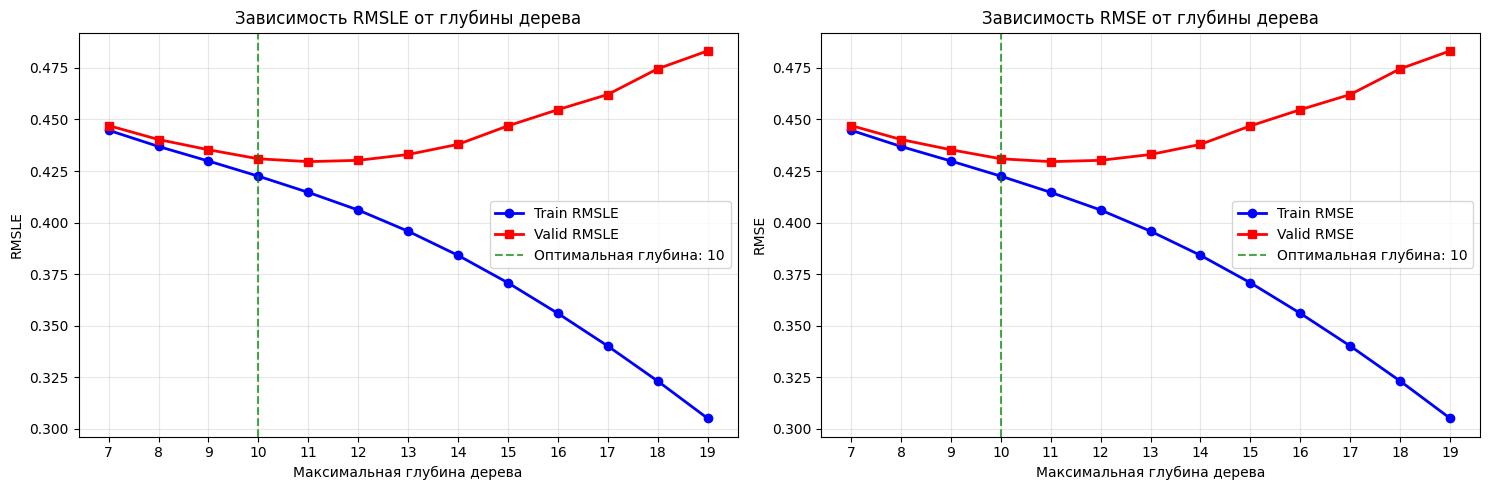


ФИНАЛЬНАЯ МОДЕЛЬ:
Финальная модель с глубиной 10:
  Фактическая глубина: 10
  Количество листьев: 983
  RMSLE train: 0.422501
  RMSLE valid: 0.430926


In [69]:
# ваш код здесь

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Диапазон глубин для тестирования
max_depths = range(7, 20)
print(f"\nТестируемый диапазон глубин: {list(max_depths)}")

# Списки для хранения результатов
train_rmsle_scores = []
valid_rmsle_scores = []
train_rmse_scores = []
valid_rmse_scores = []

# Функция для вычисления RMSLE
def calculate_rmsle(y_true_log, y_pred_log):
    """Вычисляет RMSLE для логарифмированных значений"""
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

# Функция для вычисления RMSE
def calculate_rmse(y_true_log, y_pred_log):
    """Вычисляет RMSE для логарифмированных значений"""
    return np.sqrt(mean_squared_error(y_true_log, y_pred_log))

print(f"\nПЕРЕБОР ГЛУБИН ДЕРЕВА:")
print("Глубина | Train RMSLE | Valid RMSLE | Train RMSE | Valid RMSE | Переобучение")
print("--------|-------------|-------------|------------|------------|-------------")


# Перебираем различные глубины
for depth in max_depths:
    # Создаем и обучаем модель с определенной глубиной
    tree_model_depth = DecisionTreeRegressor(
        max_depth=depth,
        random_state=42
    )
    
    # Обучаем модель
    tree_model_depth.fit(X_train_scaled, y_train_log)
    
    # Делаем предсказания
    y_train_pred = tree_model_depth.predict(X_train_scaled)
    y_valid_pred = tree_model_depth.predict(X_valid_scaled)
    
    # Вычисляем метрики
    train_rmsle = calculate_rmsle(y_train_log, y_train_pred)
    valid_rmsle = calculate_rmsle(y_valid_log, y_valid_pred)
    train_rmse = calculate_rmse(y_train_log, y_train_pred)
    valid_rmse = calculate_rmse(y_valid_log, y_valid_pred)
    
    # Сохраняем результаты
    train_rmsle_scores.append(train_rmsle)
    valid_rmsle_scores.append(valid_rmsle)
    train_rmse_scores.append(train_rmse)
    valid_rmse_scores.append(valid_rmse)
    
    # Определяем переобучение
    overfitting = "Да" if valid_rmsle > train_rmsle + 0.05 else "Нет"
    
    print(f"   {depth:2d}   |    {train_rmsle:.4f}    |    {valid_rmsle:.4f}    |   {train_rmse:.4f}   |   {valid_rmse:.4f}   |     {overfitting}")

# Преобразуем в numpy массивы для удобства
train_rmsle_scores = np.array(train_rmsle_scores)
valid_rmsle_scores = np.array(valid_rmsle_scores)
train_rmse_scores = np.array(train_rmse_scores)
valid_rmse_scores = np.array(valid_rmse_scores)

print(f"\nАНАЛИЗ РЕЗУЛЬТАТОВ:")

# Находим оптимальную глубину
# Ищем точку, где валидационная кривая еще не начала возрастать
min_valid_idx = np.argmin(valid_rmsle_scores)
optimal_depth_simple = max_depths[min_valid_idx]

# Более сложный анализ: находим точку перегиба
# Ищем глубину, где разность между valid и train минимальна, но valid еще убывает
differences = valid_rmsle_scores - train_rmsle_scores
valid_derivatives = np.diff(valid_rmsle_scores)

# Находим последнюю точку, где валидационная кривая еще убывает
decreasing_indices = np.where(valid_derivatives < 0)[0]
if len(decreasing_indices) > 0:
    last_decreasing_idx = decreasing_indices[-1]
    optimal_depth = max_depths[last_decreasing_idx]
else:
    # Если всегда возрастает, берем первую точку
    optimal_depth = max_depths[0]

print(f"Минимальная RMSLE на валидации: {np.min(valid_rmsle_scores):.4f} при глубине {optimal_depth_simple}")
print(f"Оптимальная глубина (до начала переобучения): {optimal_depth}")

# Получаем метрики для оптимальной глубины
optimal_idx = list(max_depths).index(optimal_depth)
optimal_train_rmsle = train_rmsle_scores[optimal_idx]
optimal_valid_rmsle = valid_rmsle_scores[optimal_idx]
optimal_train_rmse = train_rmse_scores[optimal_idx]
optimal_valid_rmse = valid_rmse_scores[optimal_idx]

print(f"\nМетрики для оптимальной глубины {optimal_depth}:")
print(f"  RMSLE train: {optimal_train_rmsle:.4f}")
print(f"  RMSLE valid: {optimal_valid_rmsle:.4f}")
print(f"  RMSE train: {optimal_train_rmse:.4f}")
print(f"  RMSE valid: {optimal_valid_rmse:.4f}")

# Построение графиков
plt.figure(figsize=(15, 5))

# График RMSLE
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_rmsle_scores, 'o-', label='Train RMSLE', color='blue', linewidth=2, markersize=6)
plt.plot(max_depths, valid_rmsle_scores, 's-', label='Valid RMSLE', color='red', linewidth=2, markersize=6)
plt.axvline(x=optimal_depth, color='green', linestyle='--', alpha=0.7, label=f'Оптимальная глубина: {optimal_depth}')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSLE')
plt.title('Зависимость RMSLE от глубины дерева')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(max_depths)

# График RMSE
plt.subplot(1, 2, 2)
plt.plot(max_depths, train_rmse_scores, 'o-', label='Train RMSE', color='blue', linewidth=2, markersize=6)
plt.plot(max_depths, valid_rmse_scores, 's-', label='Valid RMSE', color='red', linewidth=2, markersize=6)
plt.axvline(x=optimal_depth, color='green', linestyle='--', alpha=0.7, label=f'Оптимальная глубина: {optimal_depth}')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('RMSE')
plt.title('Зависимость RMSE от глубины дерева')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(max_depths)

plt.tight_layout()
plt.show()

# Обучаем финальную модель с оптимальной глубиной
print(f"\nФИНАЛЬНАЯ МОДЕЛЬ:")
optimal_tree = DecisionTreeRegressor(
    max_depth=optimal_depth,
    random_state=42
)
optimal_tree.fit(X_train_scaled, y_train_log)

# Проверяем финальные метрики
y_train_pred_optimal = optimal_tree.predict(X_train_scaled)
y_valid_pred_optimal = optimal_tree.predict(X_valid_scaled)

final_train_rmsle = calculate_rmsle(y_train_log, y_train_pred_optimal)
final_valid_rmsle = calculate_rmsle(y_valid_log, y_valid_pred_optimal)

print(f"Финальная модель с глубиной {optimal_depth}:")
print(f"  Фактическая глубина: {optimal_tree.get_depth()}")
print(f"  Количество листьев: {optimal_tree.get_n_leaves()}")
print(f"  RMSLE train: {final_train_rmsle:.6f}")
print(f"  RMSLE valid: {final_valid_rmsle:.6f}")


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

✍ Переходим к тяжёлой артиллерии — ансамблевым алгоритмам.

Примечание. Обучение ансамблевых методов на таком большом объёме данных может занимать немало времени (до нескольких десятков минут), поэтому будьте особенно внимательны: при выполнении заданий и перед запуском обучения убедитесь в том, что вы выполнили все заданные условия.

Также советуем заварить чай и найти расслабляющее видео, чтобы приятно скоротать время в ожидании обучения ваших моделей.

Ещё один лайфхак: при желании вы можете установить параметр verbose=True, чтобы отображать процесс обучения моделей и понимать, сколько времени осталось до конца обучения.

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [71]:
# ваш код здесь

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Создаем модель случайного леса с заданными гиперпараметрами
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    n_jobs=-1  # Используем все доступные ядра для ускорения
)

print(f"\nПАРАМЕТРЫ МОДЕЛИ")
print(f"Гиперпараметры RandomForestRegressor:")
print(f"  n_estimators: {rf_model.n_estimators}")
print(f"  max_depth: {rf_model.max_depth}")
print(f"  criterion: {rf_model.criterion}")
print(f"  min_samples_split: {rf_model.min_samples_split}")
print(f"  min_samples_leaf: {rf_model.min_samples_leaf}")
print(f"  random_state: {rf_model.random_state}")
print(f"  n_jobs: {rf_model.n_jobs}")

# Обучаем модель
rf_model.fit(X_train_scaled, y_train_log)

# Делаем предсказания
print(f"\nПРЕДСКАЗАНИЯ:")

y_train_pred_rf_log = rf_model.predict(X_train_scaled)
y_valid_pred_rf_log = rf_model.predict(X_valid_scaled)

print(f"Предсказания на обучающей выборке: {y_train_pred_rf_log.shape}")
print(f"Предсказания на валидационной выборке: {y_valid_pred_rf_log.shape}")

# Функция для вычисления RMSLE
def calculate_rmsle(y_true_log, y_pred_log):
    """Вычисляет RMSLE для логарифмированных значений"""
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))


# Вычисляем метрики
train_rmsle_rf = calculate_rmsle(y_train_log, y_train_pred_rf_log)
valid_rmsle_rf = calculate_rmsle(y_valid_log, y_valid_pred_rf_log)
print(f"\nРЕЗУЛЬТАТЫ СЛУЧАЙНОГО ЛЕСА:")
print(f"RMSLE на обучающей выборке: {train_rmsle_rf:.6f}")
print(f"RMSLE на валидационной выборке: {valid_rmsle_rf:.6f}")


ПАРАМЕТРЫ МОДЕЛИ
Гиперпараметры RandomForestRegressor:
  n_estimators: 200
  max_depth: 12
  criterion: squared_error
  min_samples_split: 20
  min_samples_leaf: 1
  random_state: 42
  n_jobs: -1

ПРЕДСКАЗАНИЯ:
Предсказания на обучающей выборке: (977016,)
Предсказания на валидационной выборке: (481217,)

РЕЗУЛЬТАТЫ СЛУЧАЙНОГО ЛЕСА:
RMSLE на обучающей выборке: 0.399198
RMSLE на валидационной выборке: 0.413962


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [72]:
# ваш код здесь

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Создаем модель градиентного бустинга с заданными гиперпараметрами
gb_model = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)

print(f"\nПАРАМЕТРЫ МОДЕЛИ:")
print(f"Гиперпараметры GradientBoostingRegressor:")
print(f"  learning_rate: {gb_model.learning_rate}")
print(f"  n_estimators: {gb_model.n_estimators}")
print(f"  max_depth: {gb_model.max_depth}")
print(f"  min_samples_split: {gb_model.min_samples_split}")
print(f"  min_samples_leaf: {gb_model.min_samples_leaf}")
print(f"  subsample: {gb_model.subsample}")
print(f"  criterion: {gb_model.criterion}")
print(f"  random_state: {gb_model.random_state}")

# Обучаем модель
gb_model.fit(X_train_scaled, y_train_log)

# Делаем предсказания
print(f"\nПРЕДСКАЗАНИЯ:")
y_train_pred_gb_log = gb_model.predict(X_train_scaled)
y_valid_pred_gb_log = gb_model.predict(X_valid_scaled)
print(f"Предсказания на обучающей выборке: {y_train_pred_gb_log.shape}")
print(f"Предсказания на валидационной выборке: {y_valid_pred_gb_log.shape}")


# Функция для вычисления RMSLE
def calculate_rmsle(y_true_log, y_pred_log):
    """Вычисляет RMSLE для логарифмированных значений"""
    return np.sqrt(np.mean((y_true_log - y_pred_log) ** 2))

# Вычисляем метрики
train_rmsle_gb = calculate_rmsle(y_train_log, y_train_pred_gb_log)
valid_rmsle_gb = calculate_rmsle(y_valid_log, y_valid_pred_gb_log)

print(f"\nРЕЗУЛЬТАТЫ ГРАДИЕНТНОГО БУСТИНГА:")
print(f"RMSLE на обучающей выборке: {train_rmsle_gb:.6f}")
print(f"RMSLE на валидационной выборке: {valid_rmsle_gb:.6f}")


ПАРАМЕТРЫ МОДЕЛИ:
Гиперпараметры GradientBoostingRegressor:
  learning_rate: 0.5
  n_estimators: 100
  max_depth: 6
  min_samples_split: 30
  min_samples_leaf: 1
  subsample: 1.0
  criterion: friedman_mse
  random_state: 42

ПРЕДСКАЗАНИЯ:
Предсказания на обучающей выборке: (977016,)
Предсказания на валидационной выборке: (481217,)

РЕЗУЛЬТАТЫ ГРАДИЕНТНОГО БУСТИНГА:
RMSLE на обучающей выборке: 0.371020
RMSLE на валидационной выборке: 0.393565


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


> Ответ: Градиентный бустинг над деревьями решений

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


In [73]:
# ваш код здесь

# Информация о важности признаков (топ-15)
feature_importance_gb = gb_model.feature_importances_
feature_names = selected_features_names
importance_df_gb = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance_gb
}).sort_values('importance', ascending=False)

print(f"\n=== ТОП-15 ВАЖНЫХ ПРИЗНАКОВ В ГРАДИЕНТНОМ БУСТИНГЕ ===")
for i, (_, row) in enumerate(importance_df_gb.head(15).iterrows()):
    print(f"{i+1:2d}. {row['feature']:<25} {row['importance']:.4f}")



=== ТОП-15 ВАЖНЫХ ПРИЗНАКОВ В ГРАДИЕНТНОМ БУСТИНГЕ ===
 1. total_distance            0.6304
 2. total_travel_time         0.1887
 3. pickup_hour               0.0583
 4. dropoff_latitude          0.0291
 5. haversine_distance        0.0219
 6. dropoff_longitude         0.0128
 7. pickup_longitude          0.0111
 8. pickup_latitude           0.0102
 9. pickup_day_of_week_7      0.0081
10. pickup_day_of_week_6      0.0061
11. number_of_steps           0.0060
12. temperature               0.0044
13. vendor_id                 0.0041
14. pickup_day_of_week_1      0.0021
15. geo_cluster_9             0.0019


Несмотря на все преимущества, у метрики RMSLE есть один недостаток — она не является интерпретируемой. Нам хотелось бы понять, насколько наша итоговая модель хорошо предсказывает целевой признак с точки зрения бизнес-процесса. Точнее, мы бы хотели получить более понятное представление об ошибке прогноза длительности поездки.

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [74]:
# ваш код здесь

from sklearn.metrics import median_absolute_error

# Важно: нужно преобразовать из логарифмического масштаба обратно в секунды
# Поскольку мы использовали log(duration + 1), обратное преобразование: exp(log_pred) - 1
y_valid_actual_seconds = np.exp(y_valid_log) - 1
y_valid_pred_gb_seconds = np.exp(y_valid_pred_gb_log) - 1

# Рассчитываем медианную абсолютную ошибку в секундах
meae_seconds = median_absolute_error(y_valid_actual_seconds, y_valid_pred_gb_seconds)

# Рассчитываем медианную абсолютную ошибку в секундах
meae_seconds = median_absolute_error(y_valid_actual_seconds, y_valid_pred_gb_seconds)

print(f"\nРАСЧЕТ МЕДИАННОЙ АБСОЛЮТНОЙ ОШИБКИ:")
print(f"MeAE в секундах: {meae_seconds:.3f} сек")

# Переводим в минуты
meae_minutes = meae_seconds / 60

print(f"MeAE в минутах: {meae_minutes:.4f} мин")


РАСЧЕТ МЕДИАННОЙ АБСОЛЮТНОЙ ОШИБКИ:
MeAE в секундах: 110.187 сек
MeAE в минутах: 1.8365 мин


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [81]:
test_data = pd.read_csv("data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [76]:
#%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\tgorbunov\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


После чего модуль можно импортировать:

In [77]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [80]:
# Создание матриц наблюдений в формате DMatrix
best_features=selected_features_names
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

NameError: name 'X_test_scaled' is not defined

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)